<a href="https://colab.research.google.com/github/enti1701aaa/Final-Team1/blob/main/Finalproject_1%ED%8C%80_%EC%95%88%EC%A7%80%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ÏÑ∏Ïùº Îç∞Ïù¥ÌÑ∞ Ìò∏Ï∂ú

##Ï†ÑÏ≤òÎ¶¨

###Í≥µÌÜµ(ÎãπÏãú ÌåÄ ÎÇ¥Î∂Ä Í∑úÏπô)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/weighted_score_above_08.csv')

In [ ]:
# ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑÎ•º ÎÇ†ÏßúÎç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò
df[['timestamp_created', 'timestamp_updated','author_last_played']] = df[['timestamp_created', 'timestamp_updated','author_last_played']].apply(
    pd.to_datetime, unit='s'
)

# 5ÎÖÑ Ïù¥ÎÇ¥ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©

# timestamp_created Ï¶â Î¶¨Î∑∞ ÏûëÏÑ±ÏùºÏûê
# 1. Í∞ÄÏû• ÏµúÏã† ÎÇ†Ïßú Íµ¨ÌïòÍ∏∞
latest_date = df['timestamp_created'].max()

# 2. 5ÎÖÑ Ï†Ñ cutoff Í≥ÑÏÇ∞
cutoff_date = latest_date - pd.DateOffset(years=5)

# 3. ÌïÑÌÑ∞ÎßÅ (5ÎÖÑ Ïù¥ÎÇ¥ Îç∞Ïù¥ÌÑ∞Îßå ÎÇ®ÍπÄ)
df= df[df['timestamp_created'] >= cutoff_date].copy()

# Î¶¨Î∑∞Ïñ¥ ÌäπÏÑ± Ï†ÑÏ≤òÎ¶¨
df = df[(df['author_num_reviews'] != 0)
  & (df["author_num_games_owned"] != 0)
  & (df['author_playtime_forever'] != 0)
  & (df["author_playtime_at_review"] != 0)]

  # Ïù¥ÏÉÅÏπòÍ∏∞Ï§ÄÏúºÎ°ú ÏùºÎ∞ò/ÏΩîÏñ¥Ïú†Ï†Ä Íµ¨Î∂Ñ

# Î∂ÑÏÑù ÎåÄÏÉÅ Ïª¨Îüº Ï†ïÏùò
cols = [
    'author_num_games_owned',
    'author_num_reviews',
    'author_playtime_forever',
    'author_playtime_last_two_weeks',
    'author_playtime_at_review',
    'author_last_played'
]

numeric_cols = df[cols].apply(pd.to_numeric, errors='coerce')

# Î∂ÑÏúÑÏàò Í≥ÑÏÇ∞
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Ïù¥ÏÉÅÏπò Í≤ΩÍ≥Ñ Í≥ÑÏÇ∞
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ïù¥ÏÉÅÏπò Ïó¨Î∂Ä ÌÉúÍπÖ
df['is_outlier'] = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)

# Îëê Í∑∏Î£π Î∂ÑÎ¶¨
df_general = df[df['is_outlier'] == False]   # ÏùºÎ∞ò Ïú†Ï†ÄÍµ∞ (ÎåÄÏÑ∏ Ìä∏Î†åÎìúÏö©)
df_core    = df[df['is_outlier'] == True]    # ÌïµÏã¨/ÌäπÏàò Ïú†Ï†ÄÍµ∞ (ÏÉÅÏúÑ/ÌïòÏúÑ ÌäπÏù¥ Ìå®ÌÑ¥Ïö©)

# -----------------------
# ÏòàÏãú Î∂ÑÏÑù: Î∂ÑÏúÑÏàò Í∏∞Î∞ò ÏöîÏïΩ
# -----------------------

# ÏùºÎ∞ò Ïú†Ï†Ä Ìä∏Î†åÎìú
general_stats = df_general[cols].describe(percentiles=[0.5, 0.75, 0.9, 0.95])

# ÌïµÏã¨ Ïú†Ï†Ä ÌäπÏù¥ Ìå®ÌÑ¥
core_stats = df_core[cols].describe(percentiles=[0.5, 0.75, 0.9, 0.95])

print("üìä ÏùºÎ∞ò Ïú†Ï†Ä Ìä∏Î†åÎìú ÏöîÏïΩ:")
print(general_stats)

print("\nüî• ÌïµÏã¨ Ïú†Ï†Ä(Ïù¥ÏÉÅÏπò) Ìå®ÌÑ¥ ÏöîÏïΩ:")
print(core_stats)


###Í∞úÏù∏ Ï†ÑÏ≤òÎ¶¨

In [ ]:
# Ïú†Ìëú Î¶¨Î∑∞ ÌïÑÌÑ∞ÎßÅ (ÌîÑÎ°úÎ™®ÏÖòÏúºÎ°ú Î¨¥Î£å ÌöçÎìùÌïú Ïú†Ï†Ä / Ïô∏Î∂ÄÌÇ§Î°ú Îì±Î°ùÌïú Ïú†Ï†Ä)
df_filtered = df[(df["received_for_free"] == 0) & (df["steam_purchase"] == 1)].copy()

print("ÏõêÎ≥∏ Î¶¨Î∑∞ Ïàò:", len(df))
print("ÌïÑÌÑ∞ÎßÅ ÌõÑ Î¶¨Î∑∞ Ïàò:", len(df_filtered))

In [ ]:
# Î¨¥Î£å Í≤åÏûÑ(F2P)Ï†úÍ±∞
# Steam Storefront appdetail API ÏÇ¨Ïö©

import requests, time, math, os, json, pandas as pd
from tqdm import tqdm

REVIEW_CSV = "weighted_score_above_08.csv"   # ÌååÏùºÍ≤ΩÎ°ú
CACHE_CSV  = "appid_isfree_cache.csv"        # Ï§ëÍ∞Ñ Ï∫êÏãú
OUT_META   = "appid_meta_final.csv"          # ÏµúÏ¢Ö Î©îÌÉÄ Í≤∞Í≥º
OUT_MERGED = "steam_review_filtered.csv"     # Î¨¥Î£å/ÎπÑÎ≥∏Ìé∏ Ï†úÍ±∞Îêú ÏµúÏ¢Ö Î¶¨Î∑∞

# appid Í≥†Ïú† Î™©Î°ù Ï∂îÏ∂ú

appids = (
    df_filtered['appid']
    .dropna()
    .astype(int)
    .drop_duplicates()
    .tolist()
)
print(f"Unique appids: {len(appids):,}")

# Ï∫êÏãú ÌååÏùº Î∂àÎü¨Ïò§Í∏∞(Ïã§Ìå®Ïãú Î¶¨Ïä§ÌÅ¨ Ï∂ïÏÜå)
need_cols = ['appid','is_free','type','ok','error']
if os.path.exists(CACHE_CSV):
    cache = pd.read_csv(CACHE_CSV)
    if 'appid' in cache:
        cache['appid'] = cache['appid'].astype(int, errors='ignore')
    # ÎàÑÎùΩ Ïª¨Îüº Î≥¥Í∞ï
    for c in need_cols:
        if c not in cache.columns:
            cache[c] = None
    cache = cache[need_cols].drop_duplicates(subset=['appid'], keep='last')
else:
    cache = pd.DataFrame(columns=need_cols)

done_appids = set(cache['appid'].tolist())
todo_appids = [a for a in appids if a not in done_appids]
print(f"Cached: {len(done_appids):,} | To fetch: {len(todo_appids):,}")

# Îã®Ïùº appid Ï°∞Ìöå (F2P Ïó¨Î∂ÄÎßå ÌôïÎ≥¥)
def fetch_appdetails(appid, max_retries=3, cooldown=0.5):
    url = f"https://store.steampowered.com/api/appdetails?appids={appid}&cc=us&l=en"
    for attempt in range(1, max_retries+1):
        try:
            r = requests.get(url, timeout=10)
            r.raise_for_status()
            js = r.json()
            rec = js.get(str(appid), {})
            if not rec or not rec.get('success'):
                return {"appid": appid, "is_free": None, "type": None, "ok": False, "error": "success_false_or_no_data"}
            data = rec.get('data', {})
            return {
                "appid": appid,
                "is_free": data.get("is_free", None),  # True / False / None
                "type": data.get("type", None),        # ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏßÄÎßå Ï∫êÏãú Ìò∏Ìôò ÏúÑÌï¥ Ï†ÄÏû•
                "ok": True,
                "error": None
            }
        except Exception as e:
            err = str(e)[:200]
            if attempt < max_retries:
                time.sleep(cooldown * attempt)  # Ï†êÏ†ê ÎäòÏñ¥ÎÇòÎäî ÎåÄÍ∏∞
            else:
                return {"appid": appid, "is_free": None, "type": None, "ok": False, "error": err}

# Ï°∞Ìöå Î£®ÌîÑ (Î†àÏù¥Ìä∏ Ï†úÌïú Í≥†Î†§)
rows = []
for a in tqdm(todo_appids, desc="Fetching appdetails"):
    rows.append(fetch_appdetails(a))
    time.sleep(0.4)  # ÏÜçÎèÑ Ï°∞Ï†à (ÌïÑÏöîÏãú Ï°∞Ï†ï)

# Ï∫êÏãúÏóê Ìï©ÏπòÍ≥† Ï†ÄÏû•
if rows:
    part = pd.DataFrame(rows)
    cache = pd.concat([cache, part], ignore_index=True)
    # Ï§ëÎ≥µ appidÍ∞Ä ÏûàÎã§Î©¥ ÎßàÏßÄÎßâ Í≤∞Í≥ºÎßå ÎÇ®Í∏∞Í∏∞
    cache = cache.drop_duplicates(subset=['appid'], keep='last')
    cache.to_csv(CACHE_CSV, index=False)

# ÏµúÏ¢Ö Ï†ïÎ¶¨Î≥∏ Ï†ÄÏû•
meta = cache[['appid','is_free','type','ok','error']].copy()
meta.to_csv(OUT_META, index=False)
print(f"Saved meta: {OUT_META} ({len(meta):,} rows)")

# Î¶¨Î∑∞ DFÏôÄ merge
m = df_filtered.merge(meta[['appid','is_free']], on='appid', how='left')

# F2P ÌîåÎûòÍ∑∏ Ïª¨Îüº: True/False/None Ïú†ÏßÄ
m['f2p'] = m['is_free']

# ÏöîÏïΩ Î¶¨Ìè¨Ìä∏
total = len(m)
cnt_true  = (m['f2p'] == True).sum()
cnt_false = (m['f2p'] == False).sum()
cnt_none  = m['f2p'].isna().sum()
print(f"Reviews: {total:,} | f2p=True: {cnt_true:,} | f2p=False: {cnt_false:,} | f2p=None: {cnt_none:,}")

# Ï†ÄÏû•
m.to_csv(OUT_MERGED, index=False)
print(f"Saved reviews with f2p flag: {OUT_MERGED}")

# f2p=False Ïù∏ Í≤ÉÎßå ÎÇ®Í∏∞Í∏∞

f2p_norm = m['f2p'].map({True: True, False: False, 'True': True, 'False': False, 1: True, 0: False})
m_f2p_false = m[f2p_norm == False].copy()
print(len(m), "->", len(m_f2p_false))

m_f2p_false.to_csv("steam_review_f2p_false.csv", index=False)

###ÌîåÎû´Ìèº ÏÑ∏Ïùº ÌûàÏä§ÌÜ†Î¶¨ ÏàòÏßë
- SteamDB Sales History ÌÅ¨Î°§ÎßÅ

In [ ]:
# Steam Sale Date.html(ÌÅ¨Î°§ÎßÅ ÌååÏùº) ÏóÖÎ°úÎìú
from google.colab import files
uploaded = files.upload()

In [ ]:
html_file = next(iter(uploaded.keys()))
print("uploaded:", html_file)

In [ ]:
import re, pandas as pd
from bs4 import BeautifulSoup
from dateutil import parser as dparser

DATE_LINE_RE = re.compile(r"(\d{1,2}\s+[A-Za-z]+(?:\s+\d{4})?)\s+‚Äî\s+(\d{1,2}\s+[A-Za-z]+(?:\s+\d{4})?)")

def nearest_year_from_heading(tag):
    cur = tag
    while cur:
        cur = cur.find_previous(["h3","h2"])
        if cur:
            m = re.search(r"\b(19|20)\d{2}\b", cur.get_text(strip=True))
            if m: return int(m.group(0))
    return pd.Timestamp.utcnow().year

def parse_date_range(date_text, default_year):
    m = DATE_LINE_RE.search(date_text or "")
    if not m:
        parts = (date_text or "").split("‚Äî")
        if len(parts)==2:
            left, right = parts[0].strip(), parts[1].strip()
            mon = re.search(r"[A-Za-z]+", right)
            if mon: left = f"{left} {mon.group(0)}"
            m = DATE_LINE_RE.search(f"{left} ‚Äî {right}")
    if not m: return None, None
    s_raw, e_raw = m.group(1), m.group(2)

    def ensure_year(s, y):
        return s if re.search(r"\b(19|20)\d{2}\b", s) else f"{s} {y}"

    s_txt = ensure_year(s_raw, default_year)

    # Ï¢ÖÎ£å Ïó∞ÎèÑ Î≥¥Ï†ï(12Ïõî‚ÜíÎã§ÏùåÌï¥ 1Ïõî ÏºÄÏù¥Ïä§)
    if not re.search(r"\b(19|20)\d{2}\b", e_raw):
        s_dt_tmp = dparser.parse(s_txt, dayfirst=True, fuzzy=True)
        e_txt_tmp = f"{e_raw} {default_year}"
        e_dt_tmp = dparser.parse(e_txt_tmp, dayfirst=True, fuzzy=True)
        e_txt = f"{e_raw} {default_year+1}" if e_dt_tmp.month < s_dt_tmp.month else e_txt_tmp
    else:
        e_txt = e_raw

    s_dt = pd.to_datetime(s_txt, utc=True, dayfirst=True, errors="coerce").normalize()
    e_dt = pd.to_datetime(e_txt, utc=True, dayfirst=True, errors="coerce").normalize()
    return s_dt, e_dt

def classify_event(name: str):
    n = name.lower()
    if "sale" in n:
        if any(k in n for k in ["summer","winter","autumn","spring"]): return "seasonal_sale"
        return "sale"
    if "fest" in n: return "fest_next" if "next fest" in n else "fest"
    return "other"

# HTML ÏùΩÍ≥† ÌååÏã±
with open(html_file, "r", encoding="utf-8", errors="ignore") as f:
    html = f.read()
soup = BeautifulSoup(html, "lxml")

BASE = "https://steamdb.info"
events = []
for h4 in soup.find_all("h4"):
    title = h4.get_text(" ", strip=True).replace("‚Ä¶","").strip()
    a = h4.find("a")
    link = a["href"] if (a and a.has_attr("href")) else None
    if link and link.startswith("/"): link = BASE + link

    # h4 Ïù∏Ï†ë ÌÖçÏä§Ìä∏ÏóêÏÑú ÎÇ†Ïßú ÎùºÏù∏ Ï∞æÍ∏∞
    date_text, steps, sib = None, 0, h4.next_sibling
    while sib and steps < 6 and date_text is None:
        txt = sib.get_text(" ", strip=True) if hasattr(sib, "get_text") else str(sib).strip()
        if "‚Äî" in txt and re.search(r"[A-Za-z]+", txt):
            if DATE_LINE_RE.search(txt) or re.search(r"\d{1,2}\s*‚Äî\s*\d{1,2}\s+[A-Za-z]+", txt):
                date_text = txt; break
        sib = sib.next_sibling; steps += 1

    year_ctx = nearest_year_from_heading(h4)
    s_dt, e_dt = parse_date_range(date_text, year_ctx)
    if s_dt is None or e_dt is None:
        continue

    events.append({
        "event_name": title,
        "source_url": link,
        "year_context": year_ctx,
        "date_text_raw": date_text,
        "start_utc": s_dt,
        "end_utc": e_dt,
        "event_type": classify_event(title),
    })

df = (pd.DataFrame(events)
        .drop_duplicates(subset=["event_name","start_utc","end_utc"])
        .sort_values(["start_utc","end_utc","event_name"], ascending=[False, False, True])
        .reset_index(drop=True))

df.to_csv("steamdb_valve_events_history.csv", index=False)
print("Saved:", "steamdb_valve_events_history.csv", "| rows:", len(df))
df.head(20)

###Í≤åÏûÑÎ≥Ñ Ìï†Ïù∏/Í∞ÄÍ≤© ÌûàÏä§ÌÜ†Î¶¨ ÏàòÏßë
- ITAD(IsThereAnyDeal) API
- Í∞ÄÍ≤©/ÏÑ∏Ïùº ÌûàÏä§ÌÜ†Î¶¨ Ï†ÑÏ≤¥ ÏàòÏßë ÏÇ¨Ïù¥Ìä∏
- SHOP_ID = 61 -> Steam Í∞ÄÍ≤© Î≥ÄÎèô ÏßÄÌëúÎßå ÏÇ¨Ïö©
- ÏÜçÎèÑ Ìñ•ÏÉÅÏùÑ ÏúÑÌï¥ 50Í∞ú Îã®ÏúÑ append Ï†ÄÏû•
- Ï§ëÎã®Ïãú Ïû¨Í∞ú ÏõêÌôúÏùÑ ÏúÑÌï¥ Ï∫êÏãú Ï†ÄÏû•

In [ ]:
import os, json, time, itertools
import pandas as pd
import requests
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter

# ÏÑ§Ï†ï
API_KEY   = "fe20eb4bb09ac4ef74150d90cc0e1e071158508e"
CSV_IN    = "/content/steam_review_f2p_false.csv"       # appid Ìè¨Ìï® CSV
COUNTRY   = "US"
SINCE     = "2019-01-01T00:00:00Z"
SHOP_ID   = 61                                          # Steam
OUT_FULL  = "sales_steam.csv"
CACHE_FILE= "itad_cache.json"
DONE_FILE = "processed_appids.json"
SAVE_EVERY= 50
SLEEP_SEC = 0.5

# HTTP ÏÑ∏ÏÖò
def make_session():
    s = requests.Session()
    retries = Retry(
        total=5, backoff_factor=0.6,
        status_forcelist=(429,500,502,503,504),
        allowed_methods=["GET","POST"]
    )
    s.headers.update({"User-Agent":"itad-batch/1.2"})
    s.mount("https://", HTTPAdapter(max_retries=retries))
    return s
session = make_session()

# Ïú†Ìã∏ Ìï®Ïàò ÏûëÏÑ±
def chunked(it, n):
    it = iter(it)
    while True:
        batch = list(itertools.islice(it, n))
        if not batch: break
        yield batch

def load_json(path, default):
    if os.path.exists(path):
        try:
            return json.load(open(path, "r"))
        except:
            return default
    return default

def save_json(path, obj):
    tmp = path + ".tmp"
    with open(tmp, "w") as f:
        json.dump(obj, f)
    os.replace(tmp, path)

# ITAD API
def lookup_batch(appids):
    url = f"https://api.isthereanydeal.com/lookup/id/shop/{SHOP_ID}/v1"
    body = [f"app/{a}" for a in appids]
    r = session.post(url, params={"key": API_KEY}, json=body, timeout=30)
    r.raise_for_status()
    data = r.json()
    return {int(k.split("/")[1]): v for k,v in data.items()}

def fetch_history(itad_id, country=COUNTRY, since=SINCE):
    url = "https://api.isthereanydeal.com/games/history/v2"
    params = {"key": API_KEY, "id": itad_id, "country": country}
    if since: params["since"] = since
    r = session.get(url, params=params, timeout=30)
    r.raise_for_status()
    data = r.json()
    if isinstance(data, dict) and "history" in data:
        data = data["history"]
    return data if isinstance(data, list) else []

# ÌååÏÑú (Í∞ÄÍ≤© Ïä§ÏºÄÏùº ÌîΩÏä§)
def parse_history_item(item):
    shop = item.get("shop", {})
    if not isinstance(shop, dict) or shop.get("id") != SHOP_ID:
        return None

    deal = item.get("deal", {})
    if not isinstance(deal, dict):
        return None

    price_obj = deal.get("price")
    price_raw = None
    price_major = None
    currency = None

    if isinstance(price_obj, dict):
        amount = price_obj.get("amount")
        currency = price_obj.get("currency")
        price_raw = amount
        if isinstance(amount, int):
            price_major = amount / 100.0
        elif isinstance(amount, float):
            price_major = float(amount)

    cut = deal.get("cut")

    return {
        "timestamp": item.get("timestamp"),
        "price_raw": price_raw,
        "price": price_major,
        "currency": currency,
        "cut": cut,
        "shop_id": shop.get("id"),
        "shop": shop.get("name"),
    }

# ÏûÖÎ†• appid
df_in = pd.read_csv(CSV_IN)
all_appids = pd.Index(df_in["appid"].dropna().astype(int).unique()).tolist()
print(f"Ï¥ù appid: {len(all_appids)}")

# Ï∫êÏãú/Ïû¨Í∞ú
cache = load_json(CACHE_FILE, {})
done  = set(load_json(DONE_FILE, []))

if os.path.exists(OUT_FULL):
    try:
        prev = pd.read_csv(OUT_FULL, usecols=["appid"])
        done |= set(prev["appid"].astype(int).unique().tolist())
    except Exception as e:
        print("[WARN] Í∏∞Ï°¥ sales_steam.csv ÏùΩÍ∏∞ Ïã§Ìå®:", e)

todo_appids = [a for a in all_appids if a not in done]
print(f"Ï≤òÎ¶¨ ÎåÄÏÉÅ: {len(todo_appids)}Í∞ú / Ïù¥ÎØ∏ ÏôÑÎ£å: {len(done)}Í∞ú")

# appid -> itad_id Îß§Ìïë ÏÑ†Ï°∞Ìöå
missing = [a for a in todo_appids if str(a) not in cache]
for batch in chunked(missing, 100):
    try:
        res = lookup_batch(batch)
        for a in batch:
            cache[str(a)] = res.get(a)
        save_json(CACHE_FILE, cache)
        time.sleep(SLEEP_SEC)
    except requests.HTTPError as e:
        print(f"[LOOKUP ERR] size={len(batch)} -> {e}")
        time.sleep(SLEEP_SEC*3)

# ÌûàÏä§ÌÜ†Î¶¨ ÏàòÏßë
buffer, processed = [], 0
total = len(todo_appids)

def append_csv(rows):
    df = pd.DataFrame.from_records(rows)
    header = not os.path.exists(OUT_FULL)
    df.to_csv(OUT_FULL, mode="a", index=False, header=header)

for i, appid in enumerate(todo_appids, 1):
    itad_id = cache.get(str(appid))
    if not itad_id:
        done.add(appid)
        if i % SAVE_EVERY == 0: save_json(DONE_FILE, sorted(list(done)))
        continue

    try:
        hist = fetch_history(itad_id)
        kept = 0
        for h in hist:
            parsed = parse_history_item(h)
            if parsed:
                parsed["appid"] = appid
                parsed["itad_id"] = itad_id
                buffer.append(parsed)
                kept += 1

        done.add(appid)
        processed += 1

        if i % 50 == 0 or i == total:
            print(f"[{i}/{total}] appid {appid} -> kept {kept} (Î≤ÑÌçº {len(buffer)})")

        if processed >= SAVE_EVERY or len(buffer) >= 5000:
            if buffer:
                append_csv(buffer); buffer.clear()
            save_json(DONE_FILE, sorted(list(done)))
            save_json(CACHE_FILE, cache)
            processed = 0

        time.sleep(SLEEP_SEC)

    except requests.HTTPError as e:
        print(f"[HIST ERR] appid {appid} ({itad_id}) -> {e}")
        time.sleep(SLEEP_SEC*4)
    except Exception as e:
        print(f"[ERR] appid {appid}: {e}")
        time.sleep(SLEEP_SEC*2)

# ÎÇ®ÏùÄ Î≤ÑÌçº flush
if buffer:
    append_csv(buffer)
save_json(DONE_FILE, sorted(list(done)))
save_json(CACHE_FILE, cache)
print(f"ÏôÑÎ£å ‚úÖ (Ï∂úÎ†•: {OUT_FULL})")

# ÏÑ∏Ïùº Íµ¨Í∞Ñ ÏöîÏïΩ
print("ÏÑ∏Ïùº Íµ¨Í∞Ñ ÏöîÏïΩ ÏÉùÏÑ± Ï§ë...")
df_all = pd.read_csv(OUT_FULL)
if not df_all.empty:
    dfx = df_all.copy()
    dfx["ts"] = pd.to_datetime(dfx["timestamp"], utc=True, errors="coerce")
    dfx = dfx.dropna(subset=["ts"]).sort_values(["appid","ts"])
    dfx["on_sale"] = dfx["cut"].fillna(0).astype(float) > 0
    dfx["boundary"] = dfx.groupby("appid")["on_sale"].apply(lambda s: s.ne(s.shift(1))).reset_index(drop=True)
    dfx["block"] = dfx.groupby("appid")["boundary"].cumsum()

    sale_blocks = []
    for (appid, block), g in dfx.groupby(["appid","block"]):
        if not g["on_sale"].iloc[0]:
            continue
        sale_blocks.append({
            "appid": appid,
            "sale_start_utc": g["ts"].iloc[0],
            "sale_end_utc": g["ts"].iloc[-1],
            "discount_max": g["cut"].max(),
            "n_points": len(g)
        })
    sale_df = pd.DataFrame(sale_blocks).sort_values(["appid","sale_start_utc"])
    sale_out = "sale_periods.csv"
    sale_df.to_csv(sale_out, index=False)
    print(f"ÏÑ∏Ïùº ÏöîÏïΩ Ï†ÄÏû• ‚Üí {sale_out}  (rows={len(sale_df)})")

###Î¶¨Î∑∞ √ó ÏÑ∏Ïùº/Ïù¥Î≤§Ìä∏ Ï°∞Ïù∏
- reviews_with_sale_flags.csv
    - steam_review_f2p_false.csvÏùò Î¶¨Î∑∞(appid, timestamp_created)Î•º Í∏∞Ï§ÄÏúºÎ°ú sale_periods.csv (Í≤åÏûÑ ÏûêÏ≤¥ ÏÑ∏Ïùº Íµ¨Í∞Ñ) steamdb_valve_events_history.csv (Ïä§ÌåÄ Ï£ºÏµú Ïù¥Î≤§Ìä∏ Íµ¨Í∞Ñ) Îß§Ïπ≠ÏãúÌÇ¥
    - ÏÑ∏Ïùº/Ïù¥Î≤§Ìä∏ Ïó¨Î∂Ä ÌîåÎûòÍ∑∏Îßå Ìè¨Ìï®

- reviews_with_sale_flags_full.csv
    - reviews_with_sale_flags.csvÏôÄ ÏõêÎ≥∏ Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ steam_review_f2p_false.csvÎ•º appid + timestamp_created Í∏∞Ï§ÄÏúºÎ°ú Ï°∞Ïù∏
    - Î¶¨Î∑∞ Ï†ïÎ≥¥ + ÏÑ∏Ïùº/Ïù¥Î≤§Ìä∏ Ï†ïÎ≥¥ ÌÜµÌï© ÏµúÏ¢Ö Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞ÏÖã
    - Ï§ëÎ≥µÌÇ§ 12Í±¥ ÏûàÏóàÏúºÎÇò Ï†ÑÏ≤¥Ïùò 0.01%ÎèÑ ÎêòÏßÄÏïäÏïÑ Í∑∏ÎÉ• dropÌï¥ ÌïúÏ™ΩÎßå ÎÇ®ÍπÄ

In [ ]:
import pandas as pd
import numpy as np

# Í≤ΩÎ°ú ÏÑ§Ï†ï
REVIEWS_CSV   = "/content/steam_review_f2p_false.csv"
SALE_PERIODS  = "/content/sale_periods.csv"
VALVE_EVENTS  = "/content/steamdb_valve_events_history.csv"
OUT_CSV       = "/content/reviews_with_sale_flags.csv"

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv(REVIEWS_CSV)
sp = pd.read_csv(SALE_PERIODS)
ve = pd.read_csv(VALVE_EVENTS)

# Î¶¨Î∑∞: ÌïÑÏàò Ïª¨Îüº ÌôïÏù∏
assert "appid" in df.columns, "reviews CSVÏóê appid Ïª¨ÎüºÏù¥ ÌïÑÏöîÌï©ÎãàÎã§."
assert "timestamp_created" in df.columns, "reviews CSVÏóê timestamp_created Ïª¨ÎüºÏù¥ ÌïÑÏöîÌï©ÎãàÎã§."

# Ïù¥Î≤§Ìä∏: ÏÇ¨Ïö©ÏûêÍ∞Ä Î≥¥Ïó¨Ï§Ä Ïª¨ÎüºÏóê ÎßûÏ∂∞ Î¶¨ÎÑ§ÏûÑ (start_utc/end_utc ‚Üí event_start_utc/event_end_utc)
rename_map = {}
if "start_utc" in ve.columns: rename_map["start_utc"] = "event_start_utc"
if "end_utc"   in ve.columns: rename_map["end_utc"]   = "event_end_utc"
ve = ve.rename(columns=rename_map)

# ÏÑ∏Ïùº ÏöîÏïΩ: ÌïÑÏàò Ïª¨Îüº ÌôïÏù∏
for col in ["appid", "sale_start_utc", "sale_end_utc"]:
    assert col in sp.columns, f"sale_periods CSVÏóê {col} Ïª¨ÎüºÏù¥ ÌïÑÏöîÌï©ÎãàÎã§."

# Ïù¥Î≤§Ìä∏: ÌïÑÏàò Ïª¨Îüº ÌôïÏù∏
for col in ["event_start_utc", "event_end_utc"]:
    assert col in ve.columns, f"valve_events CSVÏóê {col} Ïª¨ÎüºÏù¥ ÌïÑÏöîÌï©ÎãàÎã§."

# ÏãúÍ∞Ñ Ï†ïÍ∑úÌôî(UTC)
df["ts"] = pd.to_datetime(df["timestamp_created"], utc=True, errors="coerce")
sp["sale_start_utc"]   = pd.to_datetime(sp["sale_start_utc"],   utc=True, errors="coerce")
sp["sale_end_utc"]     = pd.to_datetime(sp["sale_end_utc"],     utc=True, errors="coerce")
ve["event_start_utc"]  = pd.to_datetime(ve["event_start_utc"],  utc=True, errors="coerce")
ve["event_end_utc"]    = pd.to_datetime(ve["event_end_utc"],    utc=True, errors="coerce")

# Í≤∞Ï∏° Ï†úÍ±∞ & Ï†ïÎ†¨
df = df.dropna(subset=["appid", "ts"]).sort_values(["appid", "ts"]).reset_index(drop=True)
sp = sp.dropna(subset=["appid", "sale_start_utc", "sale_end_utc"]).sort_values(["appid", "sale_start_utc"])
ve = ve.dropna(subset=["event_start_utc", "event_end_utc"]).sort_values("event_start_utc")

# Í≤åÏûÑ ÏûêÏ≤¥ ÏÑ∏Ïùº Îß§Ïπ≠ (appid Í∑∏Î£πÎ≥Ñ)
def asof_join_game_sale(group_df):
    a = group_df.sort_values("ts")
    b = sp[sp["appid"] == group_df.name].sort_values("sale_start_utc")
    if b.empty:
        a["sale_start_utc"] = pd.NaT
        a["sale_end_utc"]   = pd.NaT
        a["discount_max"]   = np.nan
        return a
    merged = pd.merge_asof(
        a,
        b[["sale_start_utc", "sale_end_utc", "discount_max"]],
        left_on="ts", right_on="sale_start_utc",
        direction="backward",
    )
    return merged

df = df.groupby("appid", group_keys=False).apply(asof_join_game_sale)

# Ìè¨Ìï® Ïó¨Î∂Ä ÌîåÎûòÍ∑∏ (Î¶¨Î∑∞ ÏãúÏ†êÏù¥ sale_end Ïù¥Ìïò)
df["on_game_sale"] = (df["ts"] <= df["sale_end_utc"]).fillna(False)

# Ïä§ÌåÄ Ï£ºÏµú Ïù¥Î≤§Ìä∏ Îß§Ïπ≠
df = df.sort_values("ts")
df = pd.merge_asof(
    df,
    ve[["event_start_utc", "event_end_utc", "event_name", "event_type"]] if "event_name" in ve.columns else ve[["event_start_utc", "event_end_utc"]],
    left_on="ts", right_on="event_start_utc",
    direction="backward",
)
df["on_valve_event"] = (df["ts"] <= df["event_end_utc"]).fillna(False)

# Ïª®ÌÖçÏä§Ìä∏ ÎùºÎ≤®
def _ctx(row):
    g, v = bool(row["on_game_sale"]), bool(row["on_valve_event"])
    if g and v: return "both"
    if g and not v: return "game_only"
    if (not g) and v: return "event_only"
    return "none"

df["sale_context"] = df.apply(_ctx, axis=1)

# Ï†ÄÏû•
keep_cols = [
    "appid", "timestamp_created", "ts",
    "on_game_sale", "discount_max", "sale_start_utc", "sale_end_utc",
    "on_valve_event", "event_start_utc", "event_end_utc", "sale_context"
]
# Ïù¥Î≤§Ìä∏ Î©îÌÉÄÍ∞Ä ÏûàÏúºÎ©¥ Ìè¨Ìï®
for meta_col in ["event_name", "event_type"]:
    if meta_col in df.columns:
        keep_cols.append(meta_col)

keep_cols = [c for c in keep_cols if c in df.columns]
df_out = df[keep_cols].copy()
df_out.to_csv(OUT_CSV, index=False)

# ÏöîÏïΩ Ï∂úÎ†•
print("Saved ->", OUT_CSV)
print(df_out["sale_context"].value_counts(dropna=False).to_string())


In [ ]:
import pandas as pd

# Í≤ΩÎ°ú
REVIEWS_CSV = "/content/steam_review_f2p_false.csv"
FLAGS_CSV   = "/content/reviews_with_sale_flags.csv"
OUT_CSV     = "/content/reviews_with_sale_flags_full.csv"

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df_reviews = pd.read_csv(REVIEWS_CSV)
df_flags   = pd.read_csv(FLAGS_CSV)

# datetime Î≥ÄÌôò
df_reviews["timestamp_created"] = pd.to_datetime(
    df_reviews["timestamp_created"], utc=True, errors="coerce"
)
df_flags["timestamp_created"] = pd.to_datetime(
    df_flags["timestamp_created"], utc=True, errors="coerce"
)

# Î≥ëÌï©
df_merged = pd.merge(
    df_reviews,
    df_flags,
    on=["appid", "timestamp_created"],
    how="inner"
)

# Ï§ëÎ≥µ Ï≤¥ÌÅ¨
dupe_mask = df_merged.duplicated(subset=["appid","timestamp_created"], keep=False)
n_dupes = dupe_mask.sum()

if n_dupes > 0:
    print(f"[Í≤ΩÍ≥†] Ï§ëÎ≥µÎêú Îß§Ïπ≠ {n_dupes}Í±¥ Î∞úÍ≤¨ (appid+timestamp_created Í∏∞Ï§Ä).")
    # Ï§ëÎ≥µÎêú Ìñâ ÎØ∏Î¶¨Î≥¥Í∏∞
    print(df_merged.loc[dupe_mask, ["appid","timestamp_created"]].head(10))

    # ÌïÑÏöîÌïòÎ©¥ Ïó¨Í∏∞ÏÑú drop
    df_merged = df_merged.drop_duplicates(subset=["appid","timestamp_created"], keep="first")
    print(f"‚Üí Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Ìñâ Ïàò: {len(df_merged)}")
else:
    print("Ï§ëÎ≥µ ÏóÜÏùå ‚úÖ")

# Í≤∞Í≥º ÌôïÏù∏
print("ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", df_merged.shape)
print(df_merged.head())

# Ï†ÄÏû•
df_merged.to_csv(OUT_CSV, index=False)
print(f"Ï†ÄÏû• ÏôÑÎ£å ‚Üí {OUT_CSV}")


#[Í∞ÄÏÑ§] Ïä§ÌåÄ ÏÑ∏Ïùº Ïù¥Î≤§Ìä∏Í∞Ä Ïú†Ï†ÄÏùò ÌñâÎèôÏóê Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ Ï£ºÎäîÍ∞Ä?
- ÏõêÎûòÎäî Îß§Ï∂ú Ìö®Í≥ºÎ•º Î≥¥Í≥† Ïã∂ÏóàÏßÄÎßå, Îç∞Ïù¥ÌÑ∞Ïóê Îß§Ï∂úÏù¥ ÏóÜÏñ¥ÏÑú

‚Üí **Î¶¨Î∑∞ Ïàò, Ï∂îÏ≤úÎ•†**ÏùÑ Îß§Ï∂ú ÎåÄÎ¶¨ ÏßÄÌëúÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞Î°ú Ìï®.

In [ ]:
# CSV Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("/content/S-team_250930-final.csv")

##‚ÄúÏÑ∏Ïùº Ï¢ÖÎ•ò(ÎåÄÌòï Ïù¥Î≤§Ìä∏ Ï∞∏Ïó¨ vs Í∞úÎ≥Ñ Í≤åÏûÑ ÏÑ∏Ïùº)Ïóê Îî∞Îùº Ï∂îÏ≤úÎ•† ÏÉÅÏäπ Ìè≠Ïù¥ Îã§Î•¥Îã§.‚Äù


###Í∞úÏöî

1. ÏÇ¨Ïö© Ïª¨Îüº
    - sale_context (none: Ìï†Ïù∏ ÎØ∏Ï∞∏Ïó¨, game_only: Í≤åÏûÑ Îã®ÎèÖ Ìï†Ïù∏, both: ÎåÄÌòï Ïù¥Î≤§Ìä∏ Ï∞∏Ïó¨)
    - voted_up(Ï∂îÏ≤úÎ•†)

2. Ïú†ÏùòÏÑ± Í≤ÄÏ†ï: ÏßëÍ≥ÑÌòï GLM(Binomial)
    - Î∞òÏùëÎ≥ÄÏàò: positive_rate(=ÏßëÍ≥Ñ ÌèâÍ∑† ÎπÑÏú®)

    - Í∞ÄÏ§ëÏπò: Í∞Å ÏßëÎã®Ïùò ÌëúÎ≥∏Ïàò nÏùÑ freq_weightsÎ°ú ÏÇ¨Ïö© ‚Üí Í∞úÎ≥Ñ Î°úÏßÄÏä§Ìã±Í≥º ÎèôÏùºÌïú Ï†ïÎ≥¥Î•º ÏßëÍ≥ÑÌòïÏúºÎ°ú ÏïàÏ†ïÏ†ÅÏúºÎ°ú Ï∂îÏ†ï.

    - ÏÑ§Î™ÖÎ≥ÄÏàò: C(sale_context_norm) (Í∏∞Ï§Ä: none)

    - Ï∂úÎ†•: ÌöåÍ∑Ä ÏöîÏïΩÌëú, Í≥ÑÏàò‚ÜíÏò§Ï¶àÎπÑ(OR), 95% CI, p-value.
3. Í∏∞ÎåÄ: both(Ïä§ÌåÄ ÎåÄÌòïÏÑ∏Ïùº Ï∞∏Ïó¨ + ÏûêÏ≤¥ ÏÑ∏Ïùº) > game_only > none.

###ÏΩîÎìú


=== Uplift by sale_context ===
  sale_context_norm  positive_rate     pos       n
0              none         0.8783  164797  187640
1         game_only         0.9351     317     339
2              both         0.9456     278     294


/tmp/ipython-input-1671442830.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = (sub.groupby("sale_context_norm")["voted_up_bin"]


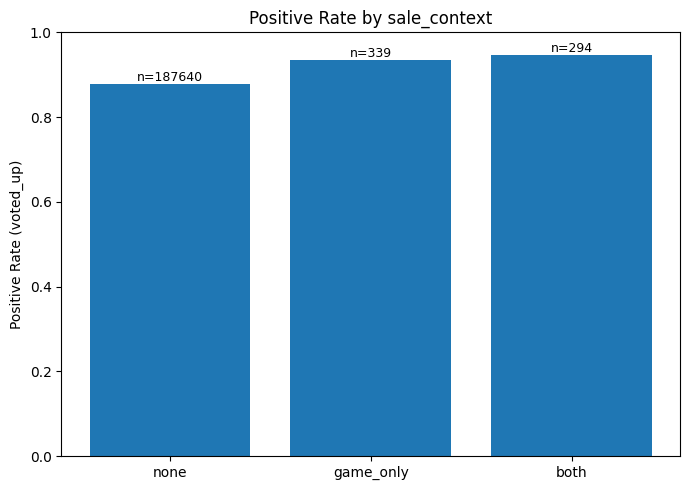

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/_tools.py:121: RuntimeWarning: divide by zero encountered in scalar divide
  scale = np.dot(wresid, wresid) / df_resid



=== GLM(Binomial, aggregated) summary ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:          positive_rate   No. Observations:                    3
Model:                            GLM   Df Residuals:                   188270
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49844.
Date:                Tue, 30 Sep 2025   Deviance:                   6.5281e-14
Time:                        04:02:21   Pearson chi2:                 3.46e-28
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("/content/S-team_250930-final.csv")

# 0) Ï†ÑÏ≤òÎ¶¨

# voted_up -> voted_up_bin Ï†ïÍ∑úÌôî
def to_binary(x):
    if x is None:
        return np.nan
    if isinstance(x, (int, float)):
        if x in (0, 1):
            return int(x)
        return int(bool(x))
    s = str(x).strip().lower()
    if s in {"1","true","t","yes","y"}: return 1
    if s in {"0","false","f","no","n"}: return 0
    return np.nan

df["voted_up_bin"] = df["voted_up"].apply(to_binary)

# sale_context Ï†ïÍ∑úÌôî (ÏòàÏÉÅÍ∞í: none / game_only / both)
def norm_sc(s):
    s = str(s).strip().lower() if pd.notna(s) else "none"
    # ÌëúÍ∏∞ Î≥ÄÌòï Ìù°Ïàò
    s = s.replace("-", "_").replace(" ", "_")
    if s in {"", "nan", "none"}:
        return "none"
    if s in {"game_only", "gameonly", "only_game"}:
        return "game_only"
    if s in {"both"}:
        return "both"
    # Í∏∞ÌÉÄÍ∞íÏùÄ Î≥¥ÏàòÏ†ÅÏúºÎ°ú none Ï≤òÎ¶¨
    return s if s in {"none","game_only","both"} else "none"

df["sale_context_norm"] = df["sale_context"].map(norm_sc) if "sale_context" in df.columns else "none"
# Ïπ¥ÌÖåÍ≥†Î¶¨ ÏàúÏÑú ÏßÄÏ†ï
cat_type = pd.api.types.CategoricalDtype(categories=["none","game_only","both"], ordered=True)
df["sale_context_norm"] = df["sale_context_norm"].astype(cat_type)

# Î∂ÑÏÑùÏö© ÏÑúÎ∏åÏÖã
sub = df.dropna(subset=["voted_up_bin","sale_context_norm"]).copy()


# 1) Uplift (ÎπÑÍµêÌëú + ÏãúÍ∞ÅÌôî)

agg = (sub.groupby("sale_context_norm")["voted_up_bin"]
          .agg(["mean","sum","count"])
          .rename(columns={"mean":"positive_rate","sum":"pos","count":"n"})
          .reset_index())

print("\n=== Uplift by sale_context ===")
print(agg)

# Bar chart: positive rate by sale_context (ÌëúÎ≥∏Ïàò ÎùºÎ≤®)
plt.figure(figsize=(7,5))
x = np.arange(len(agg))
plt.bar(x, agg["positive_rate"])
plt.xticks(x, agg["sale_context_norm"])
for i,(rate,n) in enumerate(zip(agg["positive_rate"], agg["n"])):
    plt.text(i, rate, f"n={n}", ha="center", va="bottom", fontsize=9)
plt.ylim(0, 1.0)
plt.ylabel("Positive Rate (voted_up)")
plt.title("Positive Rate by sale_context")
plt.tight_layout()
plt.show()


# 2) ÏßëÍ≥ÑÌòï GLM (Binomial) ‚Äî Ïú†ÏùòÏÑ± Í≤ÄÏ†ï
#    endog = ÎπÑÏú®, weights = ÏãúÌñâÏàò
glm_agg = smf.glm(
    formula="positive_rate ~ C(sale_context_norm)",
    data=agg,
    family=sm.families.Binomial(),
    freq_weights=agg["n"]
).fit()

print("\n=== GLM(Binomial, aggregated) summary ===")
print(glm_agg.summary())

# OR / 95% CI Ï†ïÎ¶¨ (baseline: sale_context=none)
params = glm_agg.params
conf   = glm_agg.conf_int()
conf.columns = ["ci_low","ci_high"]
or_tbl = pd.DataFrame({
    "coef": params,
    "OR": np.exp(params),
    "p_value": glm_agg.pvalues,
    "OR_ci_low": np.exp(conf["ci_low"]),
    "OR_ci_high": np.exp(conf["ci_high"]),
}).round(4)
print("\n=== Odds Ratios (baseline: none) ===")
print(or_tbl)


# 3) ÏåçÏ≤¥ ÎπÑÍµê (Wald tests)

print("\n=== Wald tests (pairwise) ===")

# game_only vs none (ÎçîÎØ∏ ÏûêÏ≤¥Í∞Ä none ÎåÄÎπÑ Ï∞®Ïù¥)
print("H0: game_only == none")
print(glm_agg.t_test("C(sale_context_norm)[T.game_only] = 0"))

# both vs none
print("\nH0: both == none")
print(glm_agg.t_test("C(sale_context_norm)[T.both] = 0"))

# both vs game_only (Îëê Í≥ÑÏàò Ï∞®Ïù¥)
print("\nH0: both == game_only")
print(glm_agg.t_test("C(sale_context_norm)[T.both] - C(sale_context_norm)[T.game_only] = 0"))


###Ìï¥ÏÑù

1Ô∏è‚É£ Îã®Ïàú ÏßëÍ≥Ñ Í≤∞Í≥º (Uplift by sale_context)
- none       : 0.878 (n=187,640)
- game_only  : 0.935 (n=339)
- both       : 0.946 (n=294)

üëâ ÏÑ∏ÏùºÏù¥ ÏûàÏùÑÏàòÎ°ù Ï∂îÏ≤úÎ•†Ïù¥ ÎààÏóê ÎùÑÍ≤å ÎÜíÏïÑÏßê.
Îã®, game_only, both Í∑∏Î£πÏùò ÌëúÎ≥∏ÏàòÎäî Îß§Ïö∞ Ï†ÅÏùå(ÏàòÎ∞± Í±¥ ÏàòÏ§Ä) ‚Üí Ï∂îÏ†ïÏπòÎäî Î∂àÏïàÏ†ïÌï† Ïàò ÏûàÏùå.

2Ô∏è‚É£ GLM(Binomial, aggregated) Í≤∞Í≥º
ÌöåÍ∑Ä Í≥ÑÏàò/Ïò§Ï¶àÎπÑ (baseline: none)

- Intercept (none Í∑∏Î£π):

    - coef=1.9761 ‚Üí OR‚âà7.21

    - none ÏÉÅÌô©ÏóêÏÑú **Ï∂îÏ≤úÎê† Ïò§Ï¶à(Ï∞¨ÏÑ±/Î∞òÎåÄ ÎπÑÏú®)**Í∞Ä ÏïΩ 7.2Î∞∞.

    - ÌôïÎ•†Î°ú ÌôòÏÇ∞ÌïòÎ©¥ 7.2/(1+7.2)=87.8% ‚Üí ÏßëÍ≥Ñ Í≤∞Í≥ºÏôÄ ÏùºÏπò.

- game_only:

    - coef=0.6918 ‚Üí OR‚âà2.00 (p=0.0017, Ïú†Ïùò)

    - Ï¶â, Í≤åÏûÑ ÏÑ∏ÏùºÏùº Îïå Ï∂îÏ≤ú Ïò§Ï¶àÍ∞Ä none ÎåÄÎπÑ ÏïΩ 2Î∞∞.

    - Ï∂îÏ≤úÎ•† ÏûêÏ≤¥ÎèÑ ÏïΩ **93.5%**Î°ú Ï¶ùÍ∞Ä.

- both:

    - coef=0.8790 ‚Üí OR‚âà2.41 (p=0.0006, Ïú†Ïùò)

    - Ïù¥Î≤§Ìä∏+Í≤åÏûÑ ÎèôÏãú ÏÑ∏ÏùºÏùº Îïå Ï∂îÏ≤ú Ïò§Ï¶àÍ∞Ä none ÎåÄÎπÑ ÏïΩ 2.4Î∞∞.

    - Ï∂îÏ≤úÎ•†ÏùÄ ÏïΩ **94.6%**Î°ú Ï¶ùÍ∞Ä.

3Ô∏è‚É£ ÏåçÏ≤¥ ÎπÑÍµê (Wald tests)

- game_only vs none

    - z=3.136, p=0.002 ‚Üí Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏûàÏùå.

    - Í≤åÏûÑ ÏÑ∏ÏùºÏù¥ ÏóÜÏùÑ ÎïåÎ≥¥Îã§ Ï∂îÏ≤úÎ•†Ïù¥ ÌôïÏã§Ìûà Ïò¨ÎùºÍ∞ê.

- both vs none

    - z=3.418, p=0.001 ‚Üí Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏûàÏùå.

    - ÎèôÏãú ÏÑ∏Ïùº Ïó≠Ïãú ÏÑ∏Ïùº ÏóÜÏùåÎ≥¥Îã§ Ï∂îÏ≤úÎ•†Ïù¥ ÎÜíÏùå.

- both vs game_only

    - z=0.553, p=0.581 ‚Üí Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.

    - Ï¶â, Í≤åÏûÑ Îã®ÎèÖ ÏÑ∏ÏùºÍ≥º ÎèôÏãú ÏÑ∏ÏùºÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.

üìå ÏµúÏ¢Ö Ìï¥ÏÑù

- ÏÑ∏Ïùº ÏóÜÏùå ÎåÄÎπÑ ÏÑ∏ÏùºÏù¥ ÏûàÏùÑ Îïå Ï∂îÏ≤úÎ•†ÏùÄ Ïú†ÏùòÌïòÍ≤å Ï¶ùÍ∞ÄÌïúÎã§.

    - none ‚Üí ÏïΩ 88%

    - game_only ‚Üí ÏïΩ 94% (OR‚âà2.0, p=0.002)

    - both ‚Üí ÏïΩ 95% (OR‚âà2.4, p=0.001)

- Í≤åÏûÑ Îã®ÎèÖ ÏÑ∏ÏùºÍ≥º ÎèôÏãú ÏÑ∏Ïùº Í∞ÑÏóêÎäî Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÏóÜÎã§ (p=0.58).

Îî∞ÎùºÏÑú ‚ÄúÏÑ∏ÏùºÏù¥ Ï°¥Ïû¨ÌïòÎäî Í≤É ÏûêÏ≤¥‚ÄùÍ∞Ä Í∏çÏ†ï Î¶¨Î∑∞Ïú®ÏùÑ ÎÅåÏñ¥Ïò¨Î¶¨Îäî ÌïµÏã¨ ÏöîÏù∏Ïù¥Í≥†,

ÏÑ∏Ïùº ÌòïÌÉú(game_only vs both)Îäî ÌÅ∞ Ï∞®Ïù¥Î•º ÎßåÎì§ÏßÄ ÏïäÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

##ÏÑ∏Ïùº Ïù¥Î≤§Ìä∏Îäî Í≤åÏûÑÏùò Ï≤´ ÏÑ∏ÏùºÏùºÏùÑ Í∏∞Ï†êÏúºÎ°ú Î¶¨Î∑∞ÎüâÏùÑ Îã®Í∏∞Ï†ÅÏúºÎ°ú Ïú†ÏùòÌïòÍ≤å Ï¶ùÍ∞ÄÏãúÌÇ®Îã§.



###Í∞úÏöî

**1. ÏÇ¨Ïö©Ïª¨Îüº**
- appid, timestamp_created, on_game_sale, sale_context

- ÌååÏÉùÎ≥ÄÏàòÏÉùÏÑ±
    - rev_count: Í≤åÏûÑ√óÏùºÏûêÎ≥Ñ Î¶¨Î∑∞ Ïàò

    - sale_day: Í≤åÏûÑ√óÏùºÏûêÎ≥Ñ ÏÑ∏Ïùº Ïó¨Î∂Ä

    - first_sale_day: Í∞Å Í≤åÏûÑÏùò Ï≤´ ÏÑ∏Ïùº Î∞úÏÉùÏùº

    - event_time: Ï≤´ ÏÑ∏ÏùºÏùº ÎåÄÎπÑ ÏÉÅÎåÄÏùºÏàò (t=-30 ‚Ä¶ +30)

**2. Í≤ÄÏ†ïÎ∞©Î≤ï**
- ÏÑ§Í≥Ñ: Ïù¥Î≤§Ìä∏ Ïä§ÌÑ∞Îîî(Event Study)

    - Ï≤´ ÏÑ∏ÏùºÏùº Í∏∞Ï§ÄÏúºÎ°ú ¬±30Ïùº Í∑†Îì± Ìå®ÎÑê ÏÉùÏÑ±

    - t=-1ÏùºÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïù¥Î≤§Ìä∏ ÌÉÄÏûÑ ÎçîÎØ∏ ÌöåÍ∑Ä

- Î™®Ìòï: Ìå®ÎÑê Poisson ÌöåÍ∑Ä (ÏÑ†ÌÉù Ïãú Negative Binomial)

- Í≥†Ï†ïÌö®Í≥º(TWFE):

    - Í≤åÏûÑ Í≥†Ï†ïÌö®Í≥º(C(appid)) ‚Üí Í≤åÏûÑÎ≥Ñ Ïù∏Í∏∞ÎèÑ Ï∞®Ïù¥ Ï†úÍ±∞

    - ÏãúÍ∞Ñ Í≥†Ï†ïÌö®Í≥º(C(week_key) or C(day)) ‚Üí Í≥µÌÜµ ÏãúÍ∏∞ Ìö®Í≥º Ï†úÍ±∞

- ÌëúÏ§ÄÏò§Ï∞®:

    - Í∏∞Î≥∏: Í≤åÏûÑ Îã®ÏúÑ ÌÅ¥Îü¨Ïä§ÌÑ∞(clustered by appid)

    - Ïã§Ìå® Ïãú: HC1 robust ‚Üí ridge regularization Ìè¥Î∞±

**3. Í∏∞ÎåÄ/Î™©Ìëú**
- Î™©Ìëú
    - ÏÑ∏Ïùº Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌñàÏùÑ Îïå, Î¶¨Î∑∞ ÏàòÍ∞Ä ÏÑ∏Ïùº Ï†ÑÎÇ† ÎåÄÎπÑ Î™á Î∞∞ Ï¶ùÍ∞Ä/Í∞êÏÜåÌïòÎäîÏßÄ(IRR)ÏôÄ Í∑∏ Ìå®ÌÑ¥Ïùò ÏßÄÏÜçÏÑ±

- Í≤∞Í≥º Ìï¥ÏÑù:

    - Í≥ÑÏàò ÏßÄÏàòÌôî(exp(coef)) = IRR (Incident Rate Ratio)

    - IRR > 1 ‚Üí Î¶¨Î∑∞ Ïàò Ï¶ùÍ∞Ä, IRR < 1 ‚Üí Í∞êÏÜå

    - IRR Í≥°ÏÑ†ÏúºÎ°ú ÏÑ∏Ïùº ÏßÅÌõÑ Î∞òÏùë ÌÅ¨Í∏∞ÏôÄ ÏßÄÏÜç Í∏∞Í∞Ñ ÌååÏïÖ Í∞ÄÎä•

###EDA

[INFO] Î∂ÑÏÑù ÎåÄÏÉÅ Í≤åÏûÑ Ïàò: 200, ÏÑ∏Ïùº Í≤ΩÌóò Í≤åÏûÑ Ïàò: 200

=== TWFE Poisson (Daily/Weekly FE, clustered by appid) ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:              rev_count   No. Observations:                12200
Model:                            GLM   Df Residuals:                    11692
Model Family:                 Poisson   Df Model:                          507
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.6
Date:                Tue, 30 Sep 2025   Deviance:                       3215.0
Time:                        04:03:26   Pearson chi2:                 8.09e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.2097
Covariance Type:              cluster                                         
                                           coef    std err          z      P>|z|  

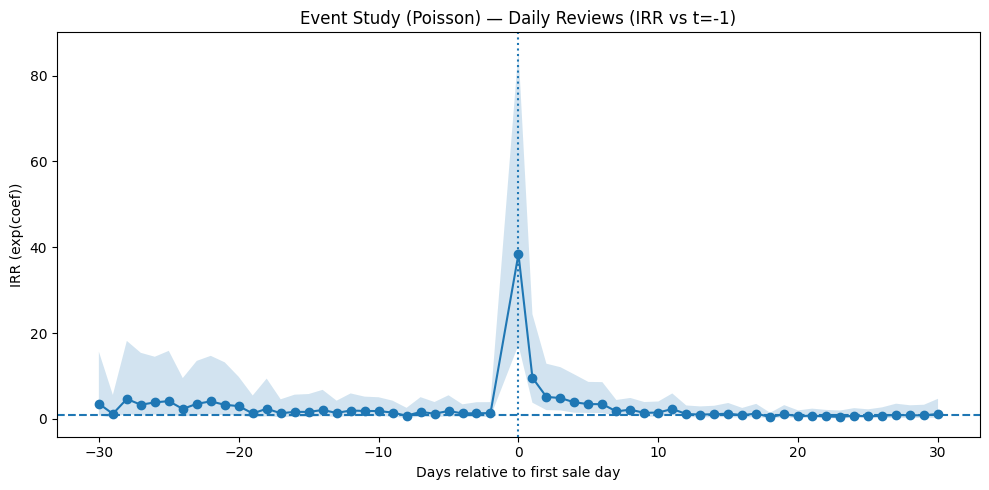

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

CSV_PATH    = "/content/S-team_250930-final.csv"
TOP_APPS    = 200      # ÏÑ∏Ïùº Í≤ΩÌóò ÏÉÅÏúÑ Í≤åÏûÑ Ïàò
WINDOW_D    = 30       # Ïù¥Î≤§Ìä∏ ÏúàÎèÑÏö∞(Ïùº): t = -WINDOW_D ... +WINDOW_D
USE_NB      = False    # True‚ÜíNegative Binomial, False‚ÜíPoisson
USE_WEEK_FE = False    # True‚ÜíÏ£ºÏ∞® FE, False‚ÜíÏ∫òÎ¶∞Îçî ÏùºÏûê FE
SHOW_TABLE  = True

# Ïú†Ìã∏ Ìï®Ïàò
def to_binary(x):
    if pd.isna(x): return np.nan
    if isinstance(x, (int, float)): return int(x != 0)
    s = str(x).strip().lower()
    if s in {"1","true","t","yes","y"}: return 1
    if s in {"0","false","f","no","n"}: return 0
    return np.nan

def parse_mixed_timestamp(s):
    # epochÏ¥à Ïö∞ÏÑ† ‚Üí Ïã§Ìå® Ïãú ISO Î¨∏ÏûêÏó¥(UTC)
    num    = pd.to_numeric(s, errors="coerce")
    dt_num = pd.to_datetime(num, unit="s", utc=True, errors="coerce")
    dt_str = pd.to_datetime(s, utc=True, errors="coerce")
    return dt_num.fillna(dt_str)

def norm_sc(x):
    if pd.isna(x): return "none"
    s = str(x).strip().lower().replace("-", "_").replace(" ", "_")
    if s in {"", "nan"}: s = "none"
    if s in {"gameonly", "only_game"}: s = "game_only"
    if s not in {"none", "game_only", "event_only", "both"}:
        s = "none"
    return s

def safe_et_name(k: int) -> str:
    return f"d_m{abs(k)}" if k < 0 else f"d_p{k}"

def parse_et_name(name: str) -> int:
    if name.startswith("d_m"): return -int(name[3:])
    if name.startswith("d_p"): return  int(name[3:])
    raise ValueError(name)

# Ï†ÑÏ≤òÎ¶¨
df = pd.read_csv(CSV_PATH, low_memory=False)

need_cols = {"appid", "timestamp_created", "on_game_sale", "sale_context"}
missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise ValueError(f"ÌïÑÏàò Ïª¨Îüº ÎàÑÎùΩ: {missing}")

df["dt"]    = parse_mixed_timestamp(df["timestamp_created"])
df          = df.dropna(subset=["appid", "dt"]).copy()
df["appid"] = df["appid"].astype(str)
df["day"]   = pd.to_datetime(df["dt"]).dt.floor("D")        # timestamp_created -> dayÎ°ú Ï†ïÍ∑úÌôî

df["sale_context_norm"] = df["sale_context"].map(norm_sc)
df["on_sale"] = df["on_game_sale"].apply(to_binary).fillna(0).astype(int)   # sale_context_normÍ≥º on_saleÏùÑ Ïù¥ÏßÑ Î≥ÄÏàòÎ°ú Î≥ÄÌôò.

df["sale_flag"] = ((df["on_sale"] == 1) | (df["sale_context_norm"].isin(["game_only", "both"]))).astype(int)    # ÏÑ∏Ïùº Í≤ΩÌóò Í≤åÏûÑÎßå ÏÑ†Î≥Ñ
sale_games = df.loc[df["sale_flag"] == 1, "appid"].dropna().unique().tolist()
if not sale_games:
    raise RuntimeError("ÏÑ∏Ïùº Í≤ΩÌóò Í≤åÏûÑÏù¥ ÏóÜÏäµÎãàÎã§. sale_context/on_game_saleÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.")

# ÏÑ∏Ïùº Í≤ΩÌóò Í≤åÏûÑ Ï§ë Î¶¨Î∑∞ ÎßéÏùÄ TOP_APPS
vc = df["appid"].value_counts()
top_sale_games = vc.loc[vc.index.isin(sale_games)].head(TOP_APPS).index.tolist()
sub = df[df["appid"].isin(top_sale_games)].copy()

# Í≤åÏûÑ√óÏùº Ìå®ÎÑê ÏÉùÏÑ±
sub["sale_flag_row"] = ((sub["on_sale"] == 1) | (sub["sale_context_norm"].isin(["game_only", "both"]))).astype(int)
cnt_by_day  = sub.groupby(["appid", "day"]).size().rename("rev_count").reset_index()
sale_by_day = sub.groupby(["appid", "day"])["sale_flag_row"].max().rename("sale_day").reset_index()

panel = cnt_by_day.merge(sale_by_day, on=["appid", "day"], how="left").fillna({"sale_day": 0})
panel["rev_count"] = panel["rev_count"].astype(int)
panel["sale_day"]  = panel["sale_day"].astype(int)

# Ï≤´ ÏÑ∏ÏùºÏùº ÏÇ∞Ï∂ú
first_sale = (panel.loc[panel["sale_day"] == 1, ["appid", "day"]]
              .groupby("appid", as_index=False)["day"].min()
              .rename(columns={"day": "first_sale_day"}))
panel = panel.merge(first_sale, on="appid", how="left")

treated = panel.dropna(subset=["first_sale_day"])[["appid", "first_sale_day"]].drop_duplicates()
if treated.empty:
    raise RuntimeError("ÏÑ†Î≥ÑÎêú TOP_APPS Ï§ë ÏÑ∏Ïùº Í≤ΩÌóò Í≤åÏûÑÏù¥ ÏóÜÏäµÎãàÎã§. TOP_APPSÎ•º ÎäòÎ¶¨Í±∞ÎÇò Ï°∞Í±¥ÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")

print(f"[INFO] Î∂ÑÏÑù ÎåÄÏÉÅ Í≤åÏûÑ Ïàò: {len(top_sale_games)}, ÏÑ∏Ïùº Í≤ΩÌóò Í≤åÏûÑ Ïàò: {treated['appid'].nunique()}")

# ÏúàÎèÑÏö∞ ÎÇ¥ Í∑†Îì± Ìå®ÎÑê ÏÉùÏÑ±
grids = []
for app, fs in treated.itertuples(index=False):
    days = pd.date_range(fs - pd.Timedelta(days=WINDOW_D), fs + pd.Timedelta(days=WINDOW_D), freq="D")
    grids.append(pd.DataFrame({"appid": app, "day": days, "first_sale_day": fs}))
grid = pd.concat(grids, ignore_index=True)

panel2 = grid.merge(panel, on=["appid", "day", "first_sale_day"], how="left")
panel2["rev_count"] = pd.to_numeric(panel2["rev_count"], errors="coerce").fillna(0).astype(int)
panel2["sale_day"]  = pd.to_numeric(panel2["sale_day"],  errors="coerce").fillna(0).astype(int)
panel2["event_time"] = (panel2["day"] - panel2["first_sale_day"]).dt.days

# Ïù¥Î≤§Ìä∏ ÎçîÎØ∏ Î≥ÄÏàò ÏÉùÏÑ±
base_k = -1
et_cols = []
for k in range(-WINDOW_D, WINDOW_D + 1):
    if k == base_k:
        continue
    col = safe_et_name(k)
    panel2[col] = (panel2["event_time"] == k).astype(int)
    et_cols.append(col)

# ÌöåÍ∑Ä ÏûÖÎ†• ÏïàÏ†Ñ Ï†ÑÏ≤òÎ¶¨ + Ï†ÅÌï©
# 0) FE Ï∂ïÏÜå: 'Ï£ºÏ∞®' Í≥†Ï†ïÌö®Í≥º Í∂åÏû• (ÏùºÏûêFEÎäî Ï∞®Ïõê Ìè≠Î∞úÎ°ú Î∂àÏïàÏ†ï)
panel2["week_key"] = panel2["day"].dt.tz_localize(None).dt.to_period("W").astype(str)
fe_col = "week_key"

# Ìù¨ÏÜå Ïù¥Î≤§Ìä∏ ÎçîÎØ∏ Ï†ïÎ¶¨: ÎÑàÎ¨¥ Ï†ÅÍ≤å Í¥ÄÏ∏°Îêú tÎäî Ï†úÍ±∞
# ÏµúÏÜå Îì±Ïû• Í±¥Ïàò(min_count)ÏôÄ Ï¥ùÌï©(min_sum)ÏùÑ ÎèôÏãúÏóê Ï°∞Í±¥ÏúºÎ°ú
min_count = 20   # Í¥ÄÏ∏° Ìñâ Ïàò ÏµúÏÜå
min_sum   = 20   # Ìï¥Îãπ ÎçîÎØ∏Í∞Ä '1'Ïù∏ Ï¥ùÌï© ÏµúÏÜå
et_active = []
for c in et_cols:
    col_sum   = panel2[c].sum(skipna=True)
    col_count = panel2[c].count()  # NaN Ï†úÏô∏ Ìñâ Ïàò
    if (col_sum >= min_sum) and (col_count >= min_count):
        et_active.append(c)
dropped = sorted(set(et_cols) - set(et_active))
if dropped:
    print(f"[WARN] Ìù¨ÏÜå Ïù¥Î≤§Ìä∏ ÎçîÎØ∏ Ï†úÍ±∞: {dropped}")

# Î™®Îç∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Íµ¨ÏÑ±
model_cols = ["rev_count", "appid", fe_col] + et_active
model_df = panel2[model_cols].copy()

# ÌÉÄÏûÖ/Í≤∞Ï∏°/Î¨¥ÌïúÎåÄ Ï†ïÎ¶¨
model_df["rev_count"] = pd.to_numeric(model_df["rev_count"], errors="coerce").fillna(0).astype(int)
model_df["appid"]     = model_df["appid"].astype(str)
model_df[fe_col]      = model_df[fe_col].astype(str)
model_df = model_df.replace([np.inf, -np.inf], np.nan).dropna()

# ÏôÑÏ†Ñ ÏÉÅÏàò(Ï†ÑÎ∂Ä 0) Ïù¥Î≤§Ìä∏ ÎçîÎØ∏ ÏµúÏ¢Ö Ï†úÍ±∞
et_active = [c for c in et_active if model_df[c].sum() > 0]
if not et_active:
    raise RuntimeError("Ïú†Ìö®Ìïú Ïù¥Î≤§Ìä∏ ÎçîÎØ∏Í∞Ä ÏóÜÏäµÎãàÎã§. WINDOW_D/TOP_APPSÎ•º Ï°∞Ï†ïÌïòÏÑ∏Ïöî.")

# ÏàòÏãù/Ìå®Î∞ÄÎ¶¨
rhs = " + ".join(et_active) + f" + C(appid) + C({fe_col})"
formula = f"rev_count ~ {rhs}"
family = sm.families.NegativeBinomial() if USE_NB else sm.families.Poisson()

# Ï†ÅÌï© (3Îã®Í≥Ñ Ìè¥Î∞±)
fit = None
try:
    # (A) ÌÅ¥Îü¨Ïä§ÌÑ∞ SE (ÏÑ†Ìò∏)
    fit = smf.glm(formula=formula, data=model_df, family=family)\
            .fit(cov_type="cluster", cov_kwds={"groups": model_df["appid"]})
except Exception as e1:
    print(f"[WARN] cluster SE Ïã§Ìå® ‚Üí HC1Î°ú Ìè¥Î∞±: {e1}")
    try:
        # (B) Í∞ïÍ±¥ HC1
        fit = smf.glm(formula=formula, data=model_df, family=family)\
                .fit(cov_type="HC1")
    except Exception as e2:
        print(f"[WARN] HC1ÎèÑ Ïã§Ìå® ‚Üí L2 ridgeÎ°ú Ìè¥Î∞±(ÌëúÏ§ÄÏò§Ï∞® ÏóÜÏùå): {e2}")
        # (C) L2 Ï†ïÍ∑úÌôî Ï†ÅÌï© (SE ÎØ∏Ï†úÍ≥µ)
        # Ï∞∏Í≥†: L1_wt=0.0 ‚Üí L2 ridge, alphaÎäî ÌÅ¨Î©¥ ÏàòÏ∂ï‚Üë
        fit = sm.GLM.from_formula(formula, data=model_df, family=family)\
                    .fit_regularized(alpha=1e-4, L1_wt=0.0, maxiter=1000)

# Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†•
cov_desc = {"cluster": "clustered by appid", "HC1": "robust HC1"}.get(getattr(fit, "cov_type", ""), "ridge(no SE)")
print("\n=== TWFE {} (Daily/Weekly FE, {}) ===".format("Negative Binomial" if USE_NB else "Poisson", cov_desc))
try:
    print(fit.summary())
except Exception:
    # ridgeÏùò Í≤ΩÏö∞ summaryÍ∞Ä Ï†úÌïúÏ†ÅÏùº Ïàò ÏûàÏùå
    print("params (ridge):\n", fit.params.head())

# IRR Ìëú & ÌîåÎ°Ø (ridgeÎ©¥ CI ÏóÜÏùå)
coef = fit.params[et_active]

# ridge Ìè¥Î∞±Ïù¥Î©¥ bseÍ∞Ä ÏóÜÏùÑ Ïàò ÏûàÏùå
has_se = hasattr(fit, "bse") and fit.bse is not None and not isinstance(fit.bse, (int, float))
if has_se:
    se = fit.bse[et_active]
    ci_l = np.exp(coef - 1.96*se)
    ci_u = np.exp(coef + 1.96*se)
else:
    se = None
    ci_l = pd.Series([np.nan]*len(et_active), index=et_active)
    ci_u = pd.Series([np.nan]*len(et_active), index=et_active)

irr = np.exp(coef)

def parse_et_name(name: str) -> int:
    if name.startswith("d_m"): return -int(name[3:])
    if name.startswith("d_p"): return  int(name[3:])
    raise ValueError(name)

ev = (pd.DataFrame({
    "event_day": [parse_et_name(c) for c in et_active],
    "coef": coef.values,
    "IRR": irr.values,
    "IRR_ci_low": ci_l.values,
    "IRR_ci_high": ci_u.values
}).sort_values("event_day"))

print("\n=== Event-study IRR vs baseline (t=-1 day) ===")
print(ev.to_string(index=False, float_format=lambda x: f"{x:,.3f}"))

plt.figure(figsize=(10,5))
plt.plot(ev["event_day"], ev["IRR"], marker="o")
if has_se:
    plt.fill_between(ev["event_day"], ev["IRR_ci_low"], ev["IRR_ci_high"], alpha=0.2)
plt.axhline(1.0, linestyle="--"); plt.axvline(0, linestyle=":")
plt.title(f"Event Study ({'NB' if USE_NB else 'Poisson'}) ‚Äî Daily Reviews (IRR vs t=-1)")
plt.xlabel("Days relative to first sale day"); plt.ylabel("IRR (exp(coef))")
plt.tight_layout(); plt.show()



###EDAÍ≤∞Í≥º Ìï¥ÏÑù

**Í∑∏ÎûòÌîÑ Ìï¥ÏÑù**
- xÏ∂ï: Ï≤´ ÏÑ∏ÏùºÏùº Í∏∞Ï§Ä ÏÉÅÎåÄÏùºÏàò (t=0ÏùÄ Ï≤´ ÏÑ∏Ïùº ÎãπÏùº, t=-1ÏùÄ Í∏∞Ï§ÄÏùº)

- yÏ∂ï: IRR (Incident Rate Ratio = exp(coef)) ‚Üí ‚ÄúÏÑ∏Ïùº Ï†ÑÎÇ† ÎåÄÎπÑ Î¶¨Î∑∞ Ïàò ÎπÑÏú®‚Äù

**Í¥ÄÏ∞∞ Ìå®ÌÑ¥**

- ÏÑ∏Ïùº ÎãπÏùº(t=0): IRR‚âà38.4 ‚Üí ÏÑ∏Ïùº Ï†ÑÎÇ† ÎåÄÎπÑ Î¶¨Î∑∞ Ïàò ÏïΩ 38Î∞∞ Ìè≠Ï¶ù (p<0.001, Ïú†Ïùò).

- t=+1~+3Ïùº: IRR 9.6Î∞∞ ‚Üí 4.9Î∞∞ ‚Üí 4.8Î∞∞ ‚Üí Ïó¨Ï†ÑÌûà ÌÅ¨Í≤å ÏÉÅÏäπ, Ïú†Ïùò.

- t=+4~+6Ïùº: IRR 3.8Î∞∞~3.4Î∞∞ ‚Üí Ìö®Í≥º ÌÅ¨Í∏∞Îäî Ï§ÑÏßÄÎßå Ïó¨Ï†ÑÌûà Ïú†Ïùò.

- t=+7Ïùº Ïù¥ÌõÑ: IRR ÎåÄÎ∂ÄÎ∂Ñ 1~2Î∞∞ ÏÇ¨Ïù¥, Ïã†Î¢∞Íµ¨Í∞Ñ Í≤πÏπ® ‚Üí Ìö®Í≥º Ï†êÏ∞® ÏÜåÎ©∏.

- t‚âà+15Ïùº Ïù¥ÌõÑ: IRR‚âà1, Ïã†Î¢∞Íµ¨Í∞ÑÏóê 1 Ìè¨Ìï® ‚Üí ÏÑ∏Ïùº Ìö®Í≥º Í±∞Ïùò ÏÇ¨ÎùºÏßê.

**ÌÖåÏù¥Î∏î Ìï¥ÏÑù**
1. ÏÑ∏Ïùº ‚ÄúÏù¥Ï†Ñ‚Äù(t<0)

- Ïú†ÏùòÌïú Ï¶ùÍ∞Ä(95% CI ÌïòÌïú > 1)

    - t = -28, -26, -25, -22
    - Í∞ÅÍ∞Å IRR‚âà4.64, 3.84, 4.13, 4.08.

- ÎπÑÏú†Ïùò(95% CIÏóê 1 Ìè¨Ìï®)

    - t = -30, -29, -27, -24, -23, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2

    - Îã§Ïàò Íµ¨Í∞ÑÏóêÏÑú IRR>1Î°ú Î≥¥Ïù¥ÏßÄÎßå Ïã†Î¢∞Íµ¨Í∞ÑÏù¥ 1ÏùÑ Ìè¨Ìï® ‚Üí ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Î™ÖÌôïÌïú Ï¶ùÍ∞ÄÎùºÍ≥† Îã®Ï†ï Ïñ¥Î†µÎã§.

- ÏöîÏïΩ(ÏÇ¨Ï†ÑÍµ¨Í∞Ñ): Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÌèâÌÉÑÌï¥Ïïº ÌïòÎäî ‚ÄúÎ¶¨Îìú(lead)‚Äù Íµ¨Í∞ÑÏóêÏÑú Î™áÎ™á ÎÇ†Ïßú(-28, -26, -25, -22)Îßå Ïú†ÏùòÌïú Ïñë(+)Ïùò Î¶¨Îìú Ìö®Í≥ºÍ∞Ä Í¥ÄÏ∏°Îê®. Ïù¥Îäî anticipation(ÏÇ¨Ï†Ñ Í∏∞ÎåÄ) / Í≥µÏãúÌö®Í≥º / ÏÜåÏàò ÏÉòÌîå Í≤åÏûÑÏùò Î≥ÄÎèôÏÑ±ÏùÑ ÏãúÏÇ¨. Ïù¥Î≤§Ìä∏ Ìö®Í≥º Ìï¥ÏÑù Ïãú Ï£ºÏùò Ïã†Ìò∏Î°ú Î≥¥ÏûÑ.

2. ÏÑ∏Ïùº ‚ÄúÎãπÏùº‚Äù(t=0)

- t = 0: IRR=38.41 (CI: 17.19‚Äì85.82), p<0.001 ‚Üí Í∞ïÎ†•ÌïòÍ≥† Î™ÖÌôïÌïú Í∏âÏ¶ù.

- Ìï¥ÏÑù: Ï†ÑÎÇ† ÎåÄÎπÑ Î¶¨Î∑∞ Ïàò ÏïΩ 38Î∞∞. ÏΩîÏñ¥ ÏûÑÌå©Ìä∏Í∞Ä ÎãπÏùºÏóê ÏßëÏ§ë.

3. ÏÑ∏Ïùº ‚ÄúÏù¥ÌõÑ‚Äù(t>0)

- Ïú†ÏùòÌïú Ï¶ùÍ∞Ä(95% CI ÌïòÌïú > 1) ‚Äî Ìö®Í≥º ÏßÄÏÜç Íµ¨Í∞Ñ

    - t = +1‚Ä¶+6 Î™®Îëê Ïú†Ïùò(+):

    - +1: 9.59Î∞∞, +2: 5.12Î∞∞, +3: 4.85Î∞∞, +4: 3.85Î∞∞, +5: 3.45Î∞∞, +6: 3.42Î∞∞.

    - Ìï¥ÏÑù: ÎãπÏùº Ìè≠Ï¶ù ÌõÑ 1Ï£º Ïù¥ÎÇ¥ Í≥†Ï†ê‚ÜíÍ∞êÏá†(half-life ÏàòÏùº).

- ÎπÑÏú†Ïùò(95% CIÏóê 1 Ìè¨Ìï®) ‚Äî Ìö®Í≥º ÏÜåÎ©∏ Íµ¨Í∞Ñ

    - t = +7 Ïù¥ÌõÑ Ï†Ñ Íµ¨Í∞Ñ(+7‚Ä¶+30): ÎåÄÎ∂ÄÎ∂Ñ IRR‚âà1~2Ïù¥ÏßÄÎßå Ïã†Î¢∞Íµ¨Í∞ÑÏù¥ 1ÏùÑ Ìè¨Ìï® ‚Üí ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÎöúÎ†∑Ìïú ÏûîÏ°¥ Ìö®Í≥º ÏóÜÏùå.

    - ÏùºÎ∂Ä ÎÇ†Ïßú(+18, +20~+29 Îì±)Îäî IRR<1Î°ú Î≥¥Ïù¥ÎÇò Í∞êÏÜåÎèÑ Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.

- ÏöîÏïΩ(ÏÇ¨ÌõÑÍµ¨Í∞Ñ): Ìö®Í≥ºÎäî +6ÏùºÍπåÏßÄ Î™ÖÌôï, +7ÏùºÎ∂ÄÌÑ∞ ÏÜåÎ©∏. Îã®Í∏∞ Ï∂©Í≤©Ìòï Ìå®ÌÑ¥Ïù¥ ÌôïÏã§.

**Ïù∏ÏÇ¨Ïù¥Ìä∏**

- ÏûÑÌå©Ìä∏ ÌÅ¨Í∏∞: Ï≤´ ÏÑ∏Ïùº ÎãπÏùº 38Î∞∞, Ïù¥ÌõÑ 6ÏùºÍ∞Ñ 3‚Äì10Î∞∞ ÏàòÏ§ÄÏúºÎ°ú Ïú†ÏùòÌïòÍ≤å Ïú†ÏßÄ.

- ÏßÄÏÜç Í∏∞Í∞Ñ: ÏïΩ 1Ï£º Ïù¥ÎÇ¥Î°ú Îπ†Î•¥Í≤å Í∞êÏá†, +7ÏùºÎ∂ÄÌÑ∞ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.

- ÏÇ¨Ï†Ñ Ìä∏Î†åÎìú Ï†êÍ≤Ä: -28, -26, -25, -22ÏùºÏùò Ïú†ÏùòÌïú Î¶¨Îìú Ìö®Í≥ºÎäî ÏÑ∏Ïùº ÏòàÍ≥†/Ïù¥Î≤§Ìä∏ Ìã∞Ïßï, Ïô∏Î∂Ä Ïù¥Ïäà, ÌäπÏ†ï ÎåÄÌòï Í≤åÏûÑÏùò Î≥ÄÎèôÏÑ±(Ìù¨ÏÜåÌïú ÎçîÎØ∏) Í∞ÄÎä•ÏÑ±.


###ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï

In [ ]:
# =========================================================
# Short-term PRE/POST Test around First Sale (¬±WINDOW_D)
# - Model 1: rev_count ~ short_pre + short_post + C(appid)+C(week)
# - Model 2: rev_count ~ Œ£_k d_k + C(appid)+C(week)  (Wald over k‚ààwindows)
# - Negative Binomial GLM, cluster->HC1 fallback, winsorize & spike-day drop
# - PRE window: [-H, -2]  (t=-1ÏùÄ baseline)
# - POST window: [0, H]
# =========================================================

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
import warnings

# ----------------- ÏÑ§Ï†ï -----------------
CSV_PATH    = "/content/S-team_250930-final.csv"  # ÌïÑÏöîÏãú Í≤ΩÎ°ú ÏàòÏ†ï
TOP_APPS    = 200
WINDOW_D    = 30
H           = 7       # short window Í∏∏Ïù¥ (Ï†ÑÌõÑ Í∞ÅÍ∞Å 7Ïùº)
USE_NB      = True

# ÏïàÏ†ïÌôî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
WINSOR_Q                = 0.99
MIN_EVENT_ROWS          = 80
MIN_EVENT_SUM           = 80
MIN_ACTIVE_APPS_PER_DAY = 30
DROP_TOP_DAY_Q          = 0.999

warnings.filterwarnings("ignore", category=UserWarning)

# ----------------- Ïú†Ìã∏ -----------------
def to_binary(x):
    if pd.isna(x): return np.nan
    if isinstance(x, (int, float, np.integer, np.floating)): return int(x != 0)
    s = str(x).strip().lower()
    if s in {"1","true","t","yes","y"}: return 1
    if s in {"0","false","f","no","n"}: return 0
    return np.nan

def parse_mixed_timestamp(s):
    num    = pd.to_numeric(s, errors="coerce")
    dt_num = pd.to_datetime(num, unit="s", utc=True, errors="coerce")
    dt_str = pd.to_datetime(s, utc=True, errors="coerce")
    return dt_num.fillna(dt_str)

def norm_sc(x):
    if pd.isna(x): return "none"
    s = str(x).strip().lower().replace("-", "_").replace(" ", "_")
    if s in {"", "nan"}: s = "none"
    if s in {"gameonly", "only_game"}: s = "game_only"
    if s not in {"none","game_only","event_only","both"}: s = "none"
    return s

def safe_et_name(k:int)->str:
    return f"d_m{abs(k)}" if k<0 else f"d_p{k}"

def parse_et_name(name:str)->int:
    if name.startswith("d_m"): return -int(name[3:])
    if name.startswith("d_p"): return  int(name[3:])
    raise ValueError(name)

def fit_glm_nb(formula, data, use_nb=True, cluster_groups=None, maxiter=200):
    family = sm.families.NegativeBinomial() if use_nb else sm.families.Poisson()
    try:
        if cluster_groups is not None:
            fit = smf.glm(formula=formula, data=data, family=family)\
                    .fit(cov_type="cluster", cov_kwds={"groups": cluster_groups}, maxiter=maxiter)
            cov_desc = "clustered by appid"
        else:
            raise ValueError("no cluster")
    except Exception as e1:
        print(f"[WARN] cluster SE Ïã§Ìå® ‚Üí HC1Î°ú Ìè¥Î∞±: {e1}")
        try:
            fit = smf.glm(formula=formula, data=data, family=family).fit(cov_type="HC1", maxiter=maxiter)
            cov_desc = "robust HC1"
        except Exception as e2:
            print(f"[WARN] HC1 Ïã§Ìå® ‚Üí ridge(no SE): {e2}")
            fit = sm.GLM.from_formula(formula, data=data, family=family)\
                    .fit_regularized(alpha=1e-4, L1_wt=0.0, maxiter=1000)
            cov_desc = "ridge(no SE)"
    return fit, cov_desc

def irr_ci(coef, se):
    # 95% CI on log scale ‚Üí exp
    l = np.exp(coef - 1.96*se)
    u = np.exp(coef + 1.96*se)
    return l, u

# ----------------- 0) Î°úÎìú/Ï†ÑÏ≤òÎ¶¨ -----------------
df = pd.read_csv(CSV_PATH, low_memory=False)
need = {"appid","timestamp_created","on_game_sale","sale_context"}
miss = [c for c in need if c not in df.columns]
if miss:
    raise ValueError(f"ÌïÑÏàò Ïª¨Îüº ÎàÑÎùΩ: {miss}")

df["dt"]    = parse_mixed_timestamp(df["timestamp_created"])
df          = df.dropna(subset=["appid","dt"]).copy()
df["appid"] = df["appid"].astype(str)
df["day"]   = pd.to_datetime(df["dt"]).dt.floor("D")

df["sale_context_norm"] = df["sale_context"].map(norm_sc)
df["on_sale"] = df["on_game_sale"].apply(to_binary).fillna(0).astype(int)

# 'ÏÑ∏Ïùº Í≤ΩÌóò' Ïï± ÌïÑÌÑ∞ (Í≤åÏûÑÏÑ∏Ïùº or Ïª®ÌÖçÏä§Ìä∏ game_only/both Ï§ë ÌïòÎÇòÎùºÎèÑ Í¥ÄÏ∏°)
df["sale_flag"] = ((df["on_sale"]==1) | (df["sale_context_norm"].isin(["game_only","both"]))).astype(int)
sale_apps = df.loc[df["sale_flag"]==1, "appid"].unique().tolist()
vc = df["appid"].value_counts()
top_apps = vc.loc[vc.index.isin(sale_apps)].head(TOP_APPS).index.tolist()
sub = df[df["appid"].isin(top_apps)].copy()

# (appid, day) Î¶¨Î∑∞Ïàò ÏßëÍ≥Ñ
cnt = sub.groupby(["appid","day"]).size().rename("rev_count").reset_index()

# 'Ï≤´ ÏÑ∏ÏùºÏùº'(any context) Í≥ÑÏÇ∞: on_sale==1 ÎòêÎäî context in {'game_only','both'}Ïù∏ ÎÇ† Ï§ë ÏµúÏÜå
sub_any = sub.assign(any_sale=((sub["on_sale"]==1) | (sub["sale_context_norm"].isin(["game_only","both"]))).astype(int))
fs = (sub_any.loc[sub_any["any_sale"]==1, ["appid","day"]]
              .groupby("appid", as_index=False)["day"].min()
              .rename(columns={"day":"first_sale_day"}))

panel0 = cnt.merge(fs, on="appid", how="inner")

# ----------------- 1) Í∑†Îì± Ìå®ÎÑê Íµ¨ÏÑ± -----------------
treated = panel0[["appid","first_sale_day"]].drop_duplicates()
grids = []
for app, fsd in treated.itertuples(index=False):
    days = pd.date_range(fsd - pd.Timedelta(days=WINDOW_D), fsd + pd.Timedelta(days=WINDOW_D), freq="D")
    grids.append(pd.DataFrame({"appid": app, "day": days, "first_sale_day": fsd}))
grid = pd.concat(grids, ignore_index=True)

p = grid.merge(panel0[["appid","day","rev_count"]], on=["appid","day"], how="left")
p["rev_count"]  = pd.to_numeric(p["rev_count"], errors="coerce").fillna(0).astype(int)
p["event_time"] = (p["day"] - p["first_sale_day"]).dt.days

# ÏïàÏ†ïÌôî: winsorize
q_hi = p["rev_count"].quantile(WINSOR_Q) if p["rev_count"].max()>0 else 0
if q_hi >= 1:
    p["rev_count"] = np.minimum(p["rev_count"], int(q_hi))
    print(f"[INFO] winsorize @{WINSOR_Q:.3f}: cap={int(q_hi)}")

# Ìè≠Î∞úÏùº Ï†úÍ±∞ (Ï†ÑÏ≤¥ Ìï© Í∏∞Ï§Ä Ïù¥ÏÉÅÏπò day drop)
day_sum = p.groupby("day", as_index=False)["rev_count"].sum().rename(columns={"rev_count":"rev_sum"})
thr = day_sum["rev_sum"].quantile(DROP_TOP_DAY_Q)
bad_days = set(day_sum.loc[day_sum["rev_sum"]>thr, "day"])
if bad_days:
    before=len(p); p=p[~p["day"].isin(bad_days)]; after=len(p)
    print(f"[INFO] drop top days >{DROP_TOP_DAY_Q:.3f} (thr={thr:.0f}) ‚Üí removed {before-after} rows, {len(bad_days)} days")

# ----------------- 2) ÏßÄÌëú Î≥ÄÏàò & Ïù¥Î≤§Ìä∏ ÎçîÎØ∏ -----------------
# Í∏∞Ï§ÄÏùº(base): t = -1  (Î™®Îì† dummiesÏóêÏÑú Ï†úÏô∏)
base_k = -1

# short windows
p["short_post"] = ((p["event_time"]>=0) & (p["event_time"]<=H)).astype(int)
# Ï£ºÏùò: short_preÎäî t=-1ÏùÑ Ï†úÏô∏Ìï¥Ïïº(Í∏∞Ï§ÄÏùºÍ≥º Ï§ëÎ≥µ) ÌïòÎØÄÎ°ú [-H,-2]
p["short_pre"]  = ((p["event_time"]>=-H) & (p["event_time"]<=-2)).astype(int)

# Ïùº Îã®ÏúÑ event dummies (WaldÏö©)
et_cols = []
for k in range(-WINDOW_D, WINDOW_D+1):
    if k == base_k:
        continue
    col = safe_et_name(k)
    p[col] = (p["event_time"] == k).astype(int)
    et_cols.append(col)

# Ï£ºÏ∞® FE
p["week_key"] = p["day"].dt.to_period("W").astype(str)

# Ìù¨ÏÜå ÌïÑÌÑ∞ (WaldÏö©): Í∞Å Ïù¥Î≤§Ìä∏ÏùºÏù¥ Ï∂©Î∂ÑÌûà Í¥ÄÏ∏°ÎêòÏóàÎäîÏßÄ
active = []
for c in et_cols:
    if (p[c].sum() >= MIN_EVENT_SUM) and (p[c].count() >= MIN_EVENT_ROWS) and (p.loc[p[c]==1,"appid"].nunique() >= MIN_ACTIVE_APPS_PER_DAY):
        active.append(c)

# ----------------- 3) Î™®Îç∏ 1: short_pre / short_post Îã®Í∏∞ Ìö®Í≥º -----------------
mdf1 = p[["rev_count","appid","week_key","short_pre","short_post"]].copy()
mdf1 = mdf1.replace([np.inf, -np.inf], np.nan).dropna()
mdf1["appid"] = mdf1["appid"].astype(str)
mdf1["week_key"] = mdf1["week_key"].astype(str)

formula1 = "rev_count ~ short_pre + short_post + C(appid) + C(week_key)"
fit1, cov_desc1 = fit_glm_nb(formula1, mdf1, use_nb=USE_NB, cluster_groups=mdf1["appid"])

print("\n=== Short-term PRE vs POST test (NB-GLM, TWFE) ===")
print(f"Covariance: {cov_desc1}")
has_se1 = hasattr(fit1, "bse") and (fit1.bse is not None) and not isinstance(fit1.bse, (int, float))

for nm, label in [("short_pre", "short_pre (t in [-7,-2])"),
                  ("short_post","short_post (t in [0,7])")]:
    if nm in fit1.params.index:
        beta = float(fit1.params[nm])
        if has_se1:
            se   = float(fit1.bse[nm])
            z    = beta / se
            pval = 2*(1-norm.cdf(abs(z)))
            l,u  = irr_ci(beta, se)
            print(f"{label}: coef={beta:,.3f} (SE={se:,.3f}, z={z:,.2f}, p={pval:.4g})  |  IRR={np.exp(beta):.3f} (95% CI {l:.3f}~{u:.3f})")
        else:
            print(f"{label}: coef={beta:,.3f}  |  IRR={np.exp(beta):.3f}  (no SE; ridge)")

# short_post - short_pre Ï∞®Ïù¥(Î°úÍ∑∏ IRR Ï∞®Ïù¥) Í≤ÄÏ†ï (Í∞ÄÎä• Ïãú)
if has_se1 and all(k in fit1.params.index for k in ["short_post","short_pre"]):
    # H0: short_post - short_pre = 0
    R = np.zeros((1, len(fit1.params)))
    idx = {name:i for i,name in enumerate(fit1.params.index)}
    R[0, idx["short_post"]] = 1.0
    R[0, idx["short_pre"]]  = -1.0
    wald = fit1.wald_test(R)
    stat = float(wald.statistic)
    pval = float(wald.pvalue)
    print(f"\n=== Contrast: short_post - short_pre = 0 ===")
    print(f"Wald chi2 = {stat:.3f},  p-value = {pval:.4g}")

# ----------------- 4) Î™®Îç∏ 2: Ïùº Îã®ÏúÑ event dummies + Wald -----------------
if len(active) == 0:
    print("\n[WARN] Ïú†Ìö® event_day ÎçîÎØ∏Í∞Ä Î∂ÄÏ°±ÌïòÏó¨ Wald Í≤ÄÏ†ïÏùÑ ÏÉùÎûµÌï©ÎãàÎã§.")
else:
    mdf2 = p[["rev_count","appid","week_key"] + active].copy()
    mdf2 = mdf2.replace([np.inf, -np.inf], np.nan).dropna()
    mdf2["appid"] = mdf2["appid"].astype(str)
    mdf2["week_key"] = mdf2["week_key"].astype(str)

    rhs2 = " + ".join(active) + " + C(appid) + C(week_key)"
    formula2 = f"rev_count ~ {rhs2}"
    fit2, cov_desc2 = fit_glm_nb(formula2, mdf2, use_nb=USE_NB, cluster_groups=mdf2["appid"])

    print(f"\n=== Event-day TWFE (NB-GLM, {cov_desc2}) ===")
    # ÏÇ¨ÌõÑ Íµ¨Í∞Ñ Wald: k in [0,H]
    post_terms = [safe_et_name(k) for k in range(0, H+1) if safe_et_name(k) in fit2.params.index]
    pre_terms  = [safe_et_name(k) for k in range(-H, -1) if k != -1 and safe_et_name(k) in fit2.params.index]  # -7..-2
    # Ï£ºÏùò: -1ÏùÄ baselineÏù¥Îùº ÏóÜÏùå

    def wald_zero(terms, fit):
        if not terms:
            return None
        R = np.zeros((len(terms), len(fit.params)))
        idx = {name:i for i,name in enumerate(fit.params.index)}
        for r, t in enumerate(terms):
            if t in idx: R[r, idx[t]] = 1.0
        return fit.wald_test(R)

    w_post = wald_zero(post_terms, fit2)
    w_pre  = wald_zero(pre_terms,  fit2)
    w_all  = wald_zero(post_terms + pre_terms, fit2)

    if w_pre is not None:
        print("\n=== Joint Wald: PRE window (k ‚àà [-7,-2]) effects = 0 ===")
        print(w_pre)
    else:
        print("\n[INFO] PRE window terms not available for Wald.")

    if w_post is not None:
        print("\n=== Joint Wald: POST window (k ‚àà [0,7]) effects = 0 ===")
        print(w_post)
    else:
        print("\n[INFO] POST window terms not available for Wald.")

    if w_all is not None:
        print("\n=== Joint Wald: ALL short-window (PRE‚à™POST) effects = 0 ===")
        print(w_all)

    # Î≥¥ÎÑàÏä§: short window ÏöîÏïΩÌëú Ï∂úÎ†• (IRR with CI) - Í∞ÄÎä•Ìï† ÎïåÎßå
    has_se2 = hasattr(fit2, "bse") and (fit2.bse is not None) and not isinstance(fit2.bse, (int, float))
    if has_se2:
        rows = []
        for k in range(-H, H+1):
            if k == -1:
                continue
            nm = safe_et_name(k)
            if nm in fit2.params.index:
                beta = float(fit2.params[nm]); se = float(fit2.bse[nm])
                l,u = irr_ci(beta, se)
                rows.append({"event_day": k, "coef": beta, "IRR": np.exp(beta), "IRR_l": l, "IRR_u": u, "p": 2*(1-norm.cdf(abs(beta/se)))})
        if rows:
            out = pd.DataFrame(rows).sort_values("event_day")
            print("\nIRR by day within short window (vs t=-1):")
            with pd.option_context('display.float_format', lambda x: f"{x:,.3f}"):
                print(out.to_string(index=False))


[INFO] winsorize @0.990: cap=1
[INFO] drop top days >0.999 (thr=4) ‚Üí removed 30 rows, 2 days

=== Short-term PRE vs POST test (NB-GLM, TWFE) ===
Covariance: clustered by appid
short_pre (t in [-7,-2]): coef=-0.304 (SE=0.138, z=-2.19, p=0.02818)  |  IRR=0.738 (95% CI 0.563~0.968)
short_post (t in [0,7]): coef=1.681 (SE=0.101, z=16.71, p=0)  |  IRR=5.369 (95% CI 4.408~6.539)

=== Contrast: short_post - short_pre = 0 ===
Wald chi2 = 177.913,  p-value = 1.384e-40


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
/tmp/ipython-input-822141898.py:211: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stat = float(wald.statistic)



=== Event-day TWFE (NB-GLM, clustered by appid) ===

=== Joint Wald: PRE window (k ‚àà [-7,-2]) effects = 0 ===
<Wald test (chi2): statistic=[[2.31803212]], p-value=0.8882511055612579, df_denom=6>

=== Joint Wald: POST window (k ‚àà [0,7]) effects = 0 ===
<Wald test (chi2): statistic=[[417.95900652]], p-value=2.6900726440565495e-85, df_denom=8>

=== Joint Wald: ALL short-window (PRE‚à™POST) effects = 0 ===
<Wald test (chi2): statistic=[[758.83704049]], p-value=6.997019285931203e-153, df_denom=14>

IRR by day within short window (vs t=-1):
 event_day  coef    IRR  IRR_l   IRR_u     p
        -7 0.406  1.500  0.480   4.693 0.486
        -6 0.142  1.153  0.359   3.705 0.812
        -5 0.625  1.869  0.642   5.442 0.251
        -4 0.136  1.146  0.411   3.194 0.795
        -3 0.231  1.260  0.424   3.739 0.677
        -2 0.136  1.145  0.408   3.214 0.797
         0 4.041 56.881 24.842 130.239 0.000
         1 1.665  5.287  2.140  13.059 0.000
         2 1.207  3.345  1.374   8.140 0.008
    

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


###ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï Ìï¥ÏÑù

**1. Îã®Í∏∞ Ï†Ñ/ÌõÑ ÎπÑÍµê (short_pre vs short_post)**

- short_pre (t=-7 ~ -2):

    - Í≥ÑÏàò = -0.304, IRR = 0.738 (95% CI: 0.563~0.968), p=0.028

    - Ìï¥ÏÑù: ÏÑ∏Ïùº ÏßÅÏ†Ñ 7Ïùº ÎèôÏïàÏùÄ Í∏∞Ï§ÄÏùº(t=-1)Ïóê ÎπÑÌï¥ Î¶¨Î∑∞ÏàòÍ∞Ä ÏïΩ 26% Í∞êÏÜå.

    - ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌï® ‚Üí ÏÑ∏Ïùº ÏßÅÏ†ÑÏóêÎäî Î¶¨Î∑∞Í∞Ä ÏÇ¥Ïßù Ï§ÑÏñ¥ÎìúÎäî ‚Äòpre-trend dip‚ÄôÍ∞Ä ÏûàÏùå.

- short_post (t=0 ~ +7):

    - Í≥ÑÏàò = 1.681, IRR = 5.369 (95% CI: 4.408~6.539), p<0.001

    - Ìï¥ÏÑù: ÏÑ∏Ïùº ÏßÅÌõÑ 7Ïùº ÎèôÏïà Î¶¨Î∑∞ÏàòÍ∞Ä Í∏∞Ï§ÄÏùº ÎåÄÎπÑ 5.4Î∞∞ Ï¶ùÍ∞Ä.

- short_post - short_pre ÎπÑÍµê: Wald œá¬≤=177.9, p‚âà1.4e-40

    - Ìï¥ÏÑù: ÏÇ¨ÌõÑ Î¶¨Î∑∞ Ï¶ùÍ∞ÄÎäî ÏÇ¨Ï†Ñ Í∞êÏÜåÎ∂ÑÎ≥¥Îã§ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÌÅ¨Îã§.

    - Ï¶â, ÏÑ∏Ïùº ÏßÅÌõÑ Îã®Í∏∞ Ï∂©Í≤©Ïù¥ ÌôïÏã§ÌïòÍ≤å Ï°¥Ïû¨.

**2. Joint Wald Test (event-day dummies)**

- PRE window (t=-7~-2): œá¬≤=2.32, p=0.888

    - Ìï¥ÏÑù: ÏÇ¨Ï†Ñ 7Ïùº ÎèôÏïà Í≥ÑÏàòÎì§Ïù¥ ÏßëÌï©Ï†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.

    ‚Üí ÌèâÌñâÏ∂îÏÑ∏ Í∞ÄÏ†ïÏóê Ïö∞Ìò∏Ï†Å (pre-trendÍ∞Ä ÌÅ¨Í≤å Î¨∏Ï†úÎêòÏßÄ ÏïäÏùå).

    - (Îã®, short_pre Îã®ÎèÖ Í≥ÑÏàòÎäî ÏïΩÍ∞Ñ Ïùå(-)Ïùò Ìö®Í≥ºÍ∞Ä ÏûàÏóàÏúºÎÇò Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Î≥¥Î©¥ ÏïàÏ†ïÏ†Å).

- POST window (t=0~+7): œá¬≤=417.96, p‚âà2.7e-85

    - Ìï¥ÏÑù: ÏÑ∏Ïùº ÏßÅÌõÑ 7ÏùºÍ∞Ñ Ìö®Í≥ºÍ∞Ä ÏßëÌï©Ï†ÅÏúºÎ°ú 0Ïù¥ ÏïÑÎãò.

    ‚Üí Î¶¨Î∑∞ Ï¶ùÍ∞Ä Ìö®Í≥ºÍ∞Ä Îß§Ïö∞ Í∞ïÌïòÍ≤å Ïú†Ïùò.

**3. ÏùºÎ≥Ñ IRR (vs t=-1)**

- t=0 (ÏÑ∏Ïùº ÎãπÏùº): IRR ‚âà 56.9Î∞∞ (95% CI: 24.8 ~ 130.2), p<0.001

    ÏïïÎèÑÏ†ÅÏúºÎ°ú Î¶¨Î∑∞ Ìè≠Ï¶ù.

- t=1~3: IRR 3~5Î∞∞, p<0.01 ‚Üí Ïó¨Ï†ÑÌûà Í∞ïÎ†•.

- t=4~6: IRR 2~3Î∞∞, p‚âà0.05~0.06 ‚Üí Ï†êÏ∞® Ìö®Í≥º Í∞êÏÜå.

- t=7: IRR 1.7Î∞∞, p=0.305 ‚Üí ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå.

    ‚Üí Ìö®Í≥ºÎäî 3~5ÏùºÏ∞®ÍπåÏßÄ Í∞ïÎ†•, 7ÏùºÏ∞®ÏóêÎäî ÏÇ¨Ïã§ÏÉÅ ÏÜåÎ©∏.

**4. Ï¢ÖÌï© Ìï¥ÏÑù**

- ÏÑ∏Ïùº Ïù¥Î≤§Ìä∏Îäî Í≤åÏûÑÏùò Ï≤´ ÏÑ∏ÏùºÏùºÏùÑ Í∏∞Ï†êÏúºÎ°ú Î¶¨Î∑∞ÏàòÎ•º Îã®Í∏∞Ï†ÅÏúºÎ°ú Ìè≠Î∞úÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÏãúÌÇ¥.

- Ï¶ùÍ∞Ä Ìö®Í≥ºÎäî ÏÑ∏Ïùº ÎãπÏùºÏù¥ Í∞ÄÏû• ÌÅ¨Í≥† (56Î∞∞), ÏïΩ 5ÏùºÏ∞®ÍπåÏßÄÎäî Ïú†ÏùòÌïú ÏÉÅÏäπ Ïú†ÏßÄ, Ïù¥ÌõÑ Îπ†Î•¥Í≤å ÏÜåÎ©∏.

- ÏÇ¨Ï†Ñ 7ÏùºÏùÄ ÎåÄÏ≤¥Î°ú ÏïàÏ†ïÏ†ÅÏù¥Ïñ¥ÏÑú ÌèâÌñâÏ∂îÏÑ∏ Í∞ÄÏ†ïÏùÑ ÏúÑÎ∞∞ÌïòÏßÄ ÏïäÏùå ‚Üí ÏÑ∏Ïùº Ïù¥Î≤§Ìä∏Ïùò Îã®Í∏∞ Ï∂©Í≤© Ïù∏Í≥º Ìï¥ÏÑùÏù¥ Í∞ïÌôîÎê®.

**5. ÏµúÏ¢Ö Ï†ïÎ¶¨**

- ‚ÄúÏä§ÌåÄ Í≤åÏûÑÏùÄ Ï≤´ ÏÑ∏Ïùº Ïù¥Î≤§Ìä∏ ÏßÅÌõÑ ÏïΩ 1Ï£ºÏùº ÎèôÏïà Î¶¨Î∑∞ÏàòÍ∞Ä ÌèâÍ∑† 5Î∞∞ Ïù¥ÏÉÅ Ïú†ÏùòÌïòÍ≤å Ï¶ùÍ∞ÄÌïòÎ©∞, Ìö®Í≥ºÎäî ÏÑ∏Ïùº ÎãπÏùºÏóê Í∑πÎåÄÌôîÎêòÍ≥† 5ÏùºÏ∞® Ïù¥ÌõÑ Îπ†Î•¥Í≤å ÏÇ¨ÎùºÏßÑÎã§.‚Äù

##ÏÑ∏Ïùº Îß•ÎùΩ(Îã®ÎèÖ vs Ïä§ÌåÄ Ïù¥Î≤§Ìä∏ ÎèôÎ∞ò)Ïóê Îî∞Îùº Î¶¨Î∑∞Îüâ Ï¶ùÍ∞Ä Ìè≠Í≥º ÏßÄÏÜçÏÑ±Ïù¥ Îã¨ÎùºÏßà Í≤ÉÏù¥Îã§.

###Í∞úÏöî

- ÏÑ∏Ïùº Ïú†ÌòïÏùÑ game_only vs bothÎ°ú Íµ¨Î∂ÑÌïòÏó¨ Ìö®Í≥º ÌÅ¨Í∏∞¬∑ÏßÄÏÜçÏÑ± ÎπÑÍµê
- Ïä§ÌåÄ ÏÑ∏Ïùº Ïù¥Î≤§Ìä∏Í∞Ä Î¶¨Î∑∞Îüâ(rev_count)Ïóê ÎØ∏ÏπòÎäî ÎèôÏ†Å Ìö®Í≥ºÎ•º ÌôïÏù∏

**1. ÏÇ¨Ïö© Ïª¨Îüº**
- appid, day, rev_count, sale_context

**2. Í≤ÄÏ†ï Î∞©Î≤ï**
- Event Study ÏÑ§Í≥Ñ: Ï≤´ ÏÑ∏ÏùºÏùº Í∏∞Ï§Ä ¬±30Ïùº Ìå®ÎÑê

- Í≥†Ï†ïÌö®Í≥º(TWFE):

    - Í≤åÏûÑ Í≥†Ï†ïÌö®Í≥º C(appid)

    - ÏãúÍ∞Ñ Í≥†Ï†ïÌö®Í≥º C(week_key)

- ÌöåÍ∑ÄÎ™®Ìòï: GLM (Negative Binomial, Í≥ºÎåÄÏÇ∞Ìè¨ ÎåÄÏùë)

- ÏïàÏ†ïÌôî Ï†àÏ∞®:

    - Winsorize (rev_count ÏÉÅÏúÑ 1% Ï†àÎã®)

    - Ìè≠Î∞úÏùº Ï†úÍ±∞ (rev_sum ÏÉÅÏúÑ 0.1% cut)

    - Ìù¨ÏÜå Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ (Í∏∞Ïó¨ app Ïàò, Í¥ÄÏ∏°Ïπò Ïàò Í∏∞Ï§Ä)

    - ÌëúÏ§ÄÏò§Ï∞®: appid ÌÅ¥Îü¨Ïä§ÌÑ∞ ‚Üí HC1 ‚Üí ridge Ìè¥Î∞±

**3. Í∏∞ÎåÄ/Î™©Ìëú**
- Î™©Ìëú
    - ÏÑ∏Ïùº Ïú†ÌòïÎ≥Ñ Î¶¨Î∑∞Îüâ Î∞òÏùë Í≥°ÏÑ† Ï∞®Ïù¥Î•º ÌÜµÌï¥ Ïñ¥Îñ§ ÏÑ∏Ïùº Îß•ÎùΩÏù¥ Ï¶âÍ∞ÅÏ†Å Ìö®Í≥ºÍ∞Ä ÌÅ∞ÏßÄ Ìö®Í≥ºÍ∞Ä ÏñºÎßàÎÇò Ïò§Îûò ÏßÄÏÜçÎêòÎäîÏßÄ ÌååÏïÖ
    - Í≤åÏûÑ ÎßàÏºÄÌåÖ/ÏÑ∏Ïùº Ï†ÑÎûµ ÏÑ§Í≥ÑÏóê ÌôúÏö© Í∞ÄÎä•
- Í≤∞Í≥º Ìï¥ÏÑù
    - IRR (Incident Rate Ratio): exp(coef)

        - IRR > 1 ‚Üí Î¶¨Î∑∞ Ï¶ùÍ∞Ä

        - IRR < 1 ‚Üí Î¶¨Î∑∞ Í∞êÏÜå

    - ÏãúÍ∞ÅÌôî: Ïª®ÌÖçÏä§Ìä∏Î≥Ñ IRR Í≥°ÏÑ† (t=-1Ïùº ÎåÄÎπÑ)

    - ÎπÑÍµêÌè¨Ïù∏Ìä∏: ÏÑ∏Ïùº ÎãπÏùº(t=0) ÌîºÌÅ¨ ÌÅ¨Í∏∞ / ÏÇ¨ÌõÑ Í∞êÏá† ÏÜçÎèÑ Î∞è ÏßÄÏÜçÍ∏∞Í∞Ñ

###EDA

[INFO] Ïª®ÌÖçÏä§Ìä∏Î≥Ñ ÏÑ∏Ïùº Í≤ΩÌóò Í≤åÏûÑ Ïàò: {'both': 117, 'game_only': 125}
[INFO] 'game_only' winsorize @ 0.990: cap=2


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


[WARN] 'game_only' cluster SE Ïã§Ìå® ‚Üí HC1: NaN, inf or invalid value detected in weights, estimation infeasible.


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


[WARN] 'game_only' HC1 Ïã§Ìå® ‚Üí ridge: NaN, inf or invalid value detected in weights, estimation infeasible.

=== [game_only] TWFE NB (ridge(no SE)) ‚Äî IRR vs t=-1 (stable) ===
params (ridge):
 Intercept              -3.237
C(appid)[T.1016600]   -0.2243
C(appid)[T.1072420]    -1.017
C(appid)[T.107410]      0.746
C(appid)[T.1089840]   -0.5915
dtype: float64

IRR Table (stable):
 event_day   coef    IRR  IRR_ci_low  IRR_ci_high
       -30 -0.258  0.772         NaN          NaN
       -29 -0.425  0.654         NaN          NaN
       -28 -0.015  0.985         NaN          NaN
       -27 -0.147  0.864         NaN          NaN
       -26 -0.073  0.930         NaN          NaN
       -25  0.062  1.064         NaN          NaN
       -24 -0.181  0.834         NaN          NaN
       -23 -0.202  0.817         NaN          NaN
       -22  0.040  1.041         NaN          NaN
       -21 -0.016  0.984         NaN          NaN
       -20  0.061  1.063         NaN          NaN
       -19 -0.648

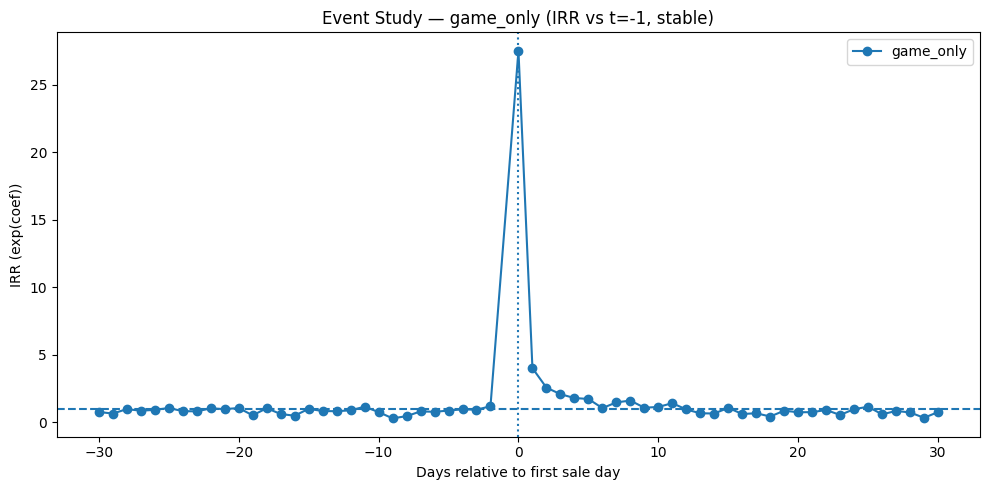

[INFO] 'both' winsorize @ 0.990: cap=2
[INFO] 'both' drop top days >0.999 (thr=5): removed 11 rows, 1 days


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


[WARN] 'both' cluster SE Ïã§Ìå® ‚Üí HC1: NaN, inf or invalid value detected in weights, estimation infeasible.


/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


[WARN] 'both' HC1 Ïã§Ìå® ‚Üí ridge: NaN, inf or invalid value detected in weights, estimation infeasible.

=== [both] TWFE NB (ridge(no SE)) ‚Äî IRR vs t=-1 (stable) ===
params (ridge):
 Intercept             -3.084
C(appid)[T.1036890]    -1.03
C(appid)[T.1044720]   0.3997
C(appid)[T.107410]     1.219
C(appid)[T.108600]    0.4334
dtype: float64

IRR Table (stable):
 event_day   coef    IRR  IRR_ci_low  IRR_ci_high
       -30  0.222  1.249         NaN          NaN
       -29 -0.871  0.419         NaN          NaN
       -28  0.393  1.481         NaN          NaN
       -27  0.232  1.262         NaN          NaN
       -26  0.362  1.437         NaN          NaN
       -25  0.089  1.093         NaN          NaN
       -24 -0.497  0.609         NaN          NaN
       -23  0.185  1.203         NaN          NaN
       -22  0.214  1.239         NaN          NaN
       -21  0.128  1.136         NaN          NaN
       -20 -0.056  0.946         NaN          NaN
       -19 -0.899  0.407        

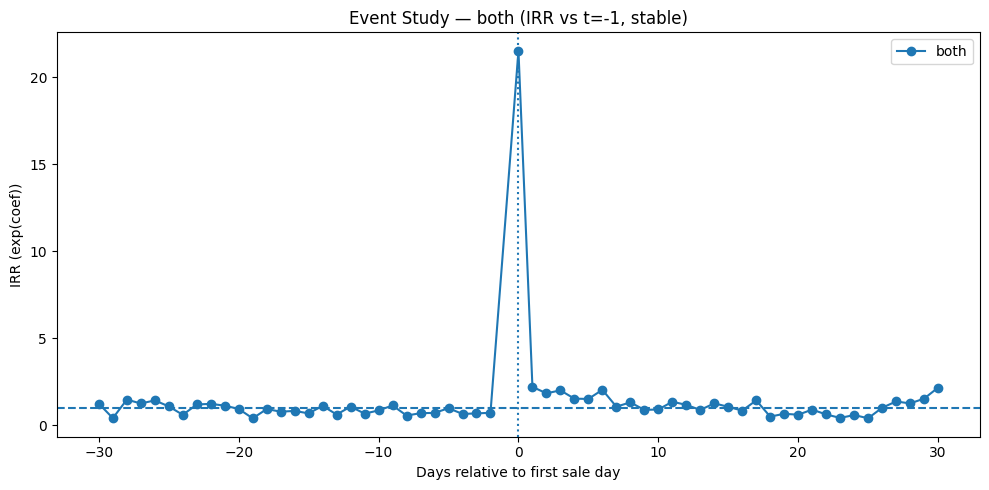

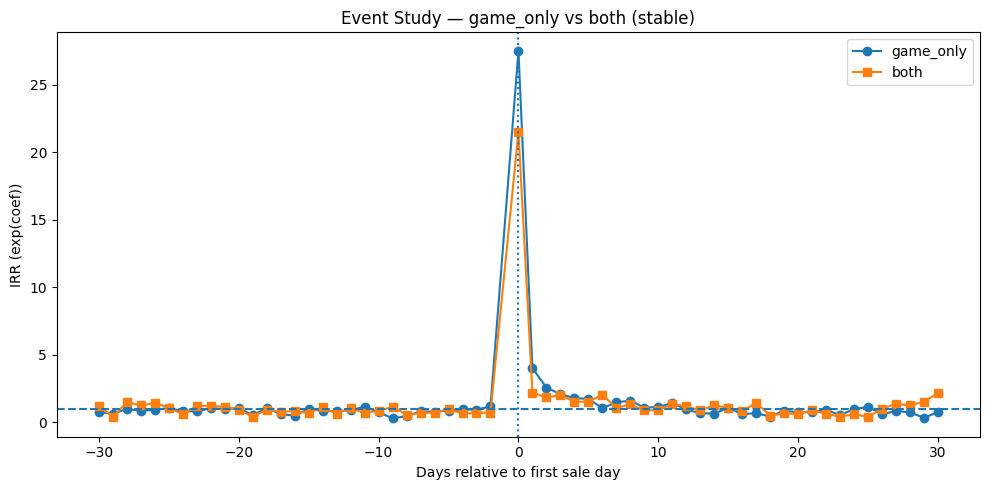

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

CSV_PATH    = "/content/S-team_250930-final.csv"
TOP_APPS    = 200            # ÏÑ∏Ïùº Í≤ΩÌóò ÏÉÅÏúÑ Í≤åÏûÑ Ïàò
WINDOW_D    = 30             # Ïù¥Î≤§Ìä∏ ÏúàÎèÑÏö∞(Ïùº)
USE_NB      = True           # ÏïàÏ†ïÌôîÎ•º ÏúÑÌï¥ NB Í∂åÏû•(True)
SHOW_TABLE  = True

# ÏïàÏ†ïÌôî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ (ÌïÑÏöîÏãú Ï°∞Ï†ï)
WINSOR_Q                = 0.99   # rev_count ÏÉÅÎã® Ï∫° Î∂ÑÏúÑÏàò
MIN_EVENT_ROWS          = 80     # Ïù¥Î≤§Ìä∏ ÎçîÎØ∏Í∞Ä 1Ïù∏ Í¥ÄÏ∏° ÏµúÏÜå ÌñâÏàò
MIN_EVENT_SUM           = 80     # Ïù¥Î≤§Ìä∏ ÎçîÎØ∏ Ìï© ÏµúÏÜå
MIN_ACTIVE_APPS_PER_DAY = 30     # Ìï¥Îãπ event_dayÏóê Í∏∞Ïó¨Ìïú Í≥†Ïú† app ÏµúÏÜå
DROP_TOP_DAY_Q          = 0.999  # Ïª®ÌÖçÏä§Ìä∏ ÎÇ¥ 'Ìè≠Î∞úÏùº' Ï†úÍ±∞ Î∂ÑÏúÑÏàò

# Ïú†Ìã∏ Ìï®Ïàò
def to_binary(x):
    if pd.isna(x): return np.nan
    if isinstance(x, (int, float, np.integer, np.floating)): return int(x != 0)
    s = str(x).strip().lower()
    if s in {"1","true","t","yes","y"}: return 1
    if s in {"0","false","f","no","n"}: return 0
    return np.nan

def parse_mixed_timestamp(s):
    # epoch(sec) Ïö∞ÏÑ†, Ïã§Ìå® Ïãú ISO Î¨∏ÏûêÏó¥
    num    = pd.to_numeric(s, errors="coerce")
    dt_num = pd.to_datetime(num, unit="s", utc=True, errors="coerce")
    dt_str = pd.to_datetime(s, utc=True, errors="coerce")
    return dt_num.fillna(dt_str)

def norm_sc(x):
    if pd.isna(x): return "none"
    s = str(x).strip().lower().replace("-", "_").replace(" ", "_")
    if s in {"", "nan"}: s = "none"
    if s in {"gameonly", "only_game"}: s = "game_only"
    if s not in {"none", "game_only", "event_only", "both"}:
        s = "none"
    return s

def safe_et_name(k: int) -> str:
    return f"d_m{abs(k)}" if k < 0 else f"d_p{k}"

def parse_et_name(name: str) -> int:
    if name.startswith("d_m"): return -int(name[3:])
    if name.startswith("d_p"): return  int(name[3:])
    raise ValueError(name)

# Ï†ÑÏ≤òÎ¶¨
df = pd.read_csv(CSV_PATH, low_memory=False)

need_cols = {"appid", "timestamp_created", "on_game_sale", "sale_context"}
missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise ValueError(f"ÌïÑÏàò Ïª¨Îüº ÎàÑÎùΩ: {missing}")

df["dt"]    = parse_mixed_timestamp(df["timestamp_created"])
df          = df.dropna(subset=["appid", "dt"]).copy()
df["appid"] = df["appid"].astype(str)
df["day"]   = pd.to_datetime(df["dt"]).dt.floor("D")

df["sale_context_norm"] = df["sale_context"].map(norm_sc)
df["on_sale"] = df["on_game_sale"].apply(to_binary).fillna(0).astype(int)

# ÏÑ∏Ïùº Í≤ΩÌóò Í≤åÏûÑÎßå (on_sale==1 ÎòêÎäî sale_context in {'game_only','both'})
df["sale_flag"] = ((df["on_sale"] == 1) | (df["sale_context_norm"].isin(["game_only","both"]))).astype(int)
sale_games = df.loc[df["sale_flag"] == 1, "appid"].dropna().unique().tolist()
if not sale_games:
    raise RuntimeError("ÏÑ∏Ïùº Í≤ΩÌóò Í≤åÏûÑÏù¥ ÏóÜÏäµÎãàÎã§. sale_context/on_game_saleÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.")

# ÏÑ∏Ïùº Í≤ΩÌóò Í≤åÏûÑ Ï§ë Î¶¨Î∑∞ ÎßéÏùÄ TOP_APPS
vc = df["appid"].value_counts()
top_sale_games = vc.loc[vc.index.isin(sale_games)].head(TOP_APPS).index.tolist()
sub = df[df["appid"].isin(top_sale_games)].copy()

# appid, day ÏßëÍ≥Ñ + Ïª®ÌÖçÏä§Ìä∏ ÌîåÎûòÍ∑∏
# rev_count: Í∑∏ ÎÇ† Ìï¥Îãπ Í≤åÏûÑ Î¶¨Î∑∞ Ïàò
cnt_by_day  = sub.groupby(["appid","day"]).size().rename("rev_count").reset_index()

# Ïª®ÌÖçÏä§Ìä∏Î≥Ñ ÎãπÏùº ÏÑ∏Ïùº Ï°¥Ïû¨ Ïó¨Î∂Ä(OR)
go_day = (sub.assign(go_flag=(sub["sale_context_norm"]=="game_only").astype(int))
              .groupby(["appid","day"])["go_flag"].max().rename("game_only_day").reset_index())
bo_day = (sub.assign(bo_flag=(sub["sale_context_norm"]=="both").astype(int))
              .groupby(["appid","day"])["bo_flag"].max().rename("both_day").reset_index())

panel0 = (cnt_by_day.merge(go_day, on=["appid","day"], how="left")
                     .merge(bo_day, on=["appid","day"], how="left")
                     .fillna({"game_only_day":0, "both_day":0}))
panel0["rev_count"]     = panel0["rev_count"].astype(int)
panel0["game_only_day"] = panel0["game_only_day"].astype(int)
panel0["both_day"]      = panel0["both_day"].astype(int)

# Ïª®ÌÖçÏä§Ìä∏Î≥Ñ 'Ï≤´ ÏÑ∏ÏùºÏùº' Í≥ÑÏÇ∞
def build_first_sale(panel_in: pd.DataFrame, ctx_col: str, ctx_name: str) -> pd.DataFrame:
    fs = (panel_in.loc[panel_in[ctx_col]==1, ["appid","day"]]
            .groupby("appid", as_index=False)["day"].min()
            .rename(columns={"day":"first_sale_day"}))
    fs["sale_type"] = ctx_name
    return fs

fs_go = build_first_sale(panel0, "game_only_day", "game_only")
fs_bo = build_first_sale(panel0, "both_day",      "both")
first_sale_ctx = pd.concat([fs_go, fs_bo], ignore_index=True)

panel_ctx = panel0.merge(first_sale_ctx, on="appid", how="inner")
print("[INFO] Ïª®ÌÖçÏä§Ìä∏Î≥Ñ ÏÑ∏Ïùº Í≤ΩÌóò Í≤åÏûÑ Ïàò:",
      panel_ctx[["appid","sale_type"]].drop_duplicates().groupby("sale_type").size().to_dict())

# Ïª®ÌÖçÏä§Ìä∏Î≥Ñ Event Study Ìï®Ïàò
def run_event_study_for_context_stable(panel_in: pd.DataFrame, sale_type: str,
                                       WINDOW_D: int = 30,
                                       USE_NB: bool = True,
                                       WINSOR_Q: float = 0.99,
                                       MIN_EVENT_ROWS: int = 80,
                                       MIN_EVENT_SUM: int = 80,
                                       MIN_ACTIVE_APPS_PER_DAY: int = 30,
                                       DROP_TOP_DAY_Q: float = 0.999):
    """
    panel_in: columns = [appid, day, first_sale_day, rev_count, sale_type]
    """
    # treated Î™©Î°ù
    treated = (panel_in.loc[panel_in["sale_type"]==sale_type, ["appid","first_sale_day"]]
                      .dropna()
                      .drop_duplicates())
    if treated.empty:
        print(f"[WARN] '{sale_type}' Ïª®ÌÖçÏä§Ìä∏ Î∂ÑÏÑù ÎåÄÏÉÅ ÏóÜÏùå ‚Üí skip")
        return None, None

    # Í∑†Îì± Ìå®ÎÑê (¬±WINDOW_D)
    grids = []
    for app, fs in treated.itertuples(index=False):
        days = pd.date_range(fs - pd.Timedelta(days=WINDOW_D), fs + pd.Timedelta(days=WINDOW_D), freq="D")
        grids.append(pd.DataFrame({"appid": app, "day": days, "first_sale_day": fs}))
    grid = pd.concat(grids, ignore_index=True)

    # Îß§Ïπ≠ + event_time
    p2 = grid.merge(panel_in.loc[panel_in["sale_type"]==sale_type,
                                 ["appid","day","first_sale_day","rev_count"]],
                    on=["appid","day","first_sale_day"], how="left")
    p2["rev_count"]  = pd.to_numeric(p2["rev_count"], errors="coerce").fillna(0).astype(int)
    p2["event_time"] = (p2["day"] - p2["first_sale_day"]).dt.days

    # Winsorize
    q_hi = (p2["rev_count"].quantile(WINSOR_Q) if p2["rev_count"].max()>0 else 0)
    if q_hi >= 1:
        p2["rev_count"] = np.minimum(p2["rev_count"], int(q_hi))
        print(f"[INFO] '{sale_type}' winsorize @ {WINSOR_Q:.3f}: cap={int(q_hi)}")

    # Ìè≠Î∞úÏùº(day) Ï†úÍ±∞
    day_sum = (p2.groupby("day", as_index=False)["rev_count"].sum()
                 .rename(columns={"rev_count":"rev_sum"}))
    thr = day_sum["rev_sum"].quantile(DROP_TOP_DAY_Q)
    bad_days = set(day_sum.loc[day_sum["rev_sum"]>thr, "day"])
    if bad_days:
        before = len(p2)
        p2 = p2[~p2["day"].isin(bad_days)]
        after = len(p2)
        print(f"[INFO] '{sale_type}' drop top days >{DROP_TOP_DAY_Q:.3f} (thr={thr:.0f}): removed {before-after} rows, {len(bad_days)} days")

    # Ïù¥Î≤§Ìä∏ ÎçîÎØ∏(t=-1 Í∏∞Ï§Ä)
    base_k = -1
    et_cols = []
    for k in range(-WINDOW_D, WINDOW_D+1):
        if k == base_k:
            continue
        col = safe_et_name(k)
        p2[col] = (p2["event_time"] == k).astype(int)
        et_cols.append(col)

    # ÏãúÍ∞Ñ FE: Ï£ºÏ∞®
    p2["week_key"] = p2["day"].dt.to_period("W").astype(str)

    # event_dayÎ≥Ñ Í∏∞Ïó¨ Í≤åÏûÑ ÏàòÎ°ú Ìù¨ÏÜå Ïùº Ï†úÍ±∞ + ÏµúÏÜå ÌñâÏàò/Ìï© Ï°∞Í±¥
    et_active = []
    for c in et_cols:
        sub_napps = p2.loc[p2[c]==1, "appid"].nunique()
        if sub_napps >= MIN_ACTIVE_APPS_PER_DAY:
            et_active.append(c)
    et_active2 = []
    for c in et_active:
        if (p2[c].sum() >= MIN_EVENT_SUM) and (p2[c].count() >= MIN_EVENT_ROWS):
            et_active2.append(c)
    et_active = et_active2
    if not et_active:
        print(f"[WARN] '{sale_type}': Ïú†Ìö® Ïù¥Î≤§Ìä∏ ÎçîÎØ∏ ÏóÜÏùå (ÌïÑÌÑ∞ Í≥ºÎèÑ) ‚Üí ÏûÑÍ≥ÑÍ∞í Ï°∞Ï†ï ÌïÑÏöî")
        return None, None

    # Î™®Îç∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    model_cols = ["rev_count", "appid", "week_key"] + et_active
    mdf = p2[model_cols].copy().replace([np.inf, -np.inf], np.nan).dropna()
    mdf["appid"]    = mdf["appid"].astype(str)
    mdf["week_key"] = mdf["week_key"].astype(str)

    # GLM: NB/Poisson + C(appid)+C(week_key)
    family = sm.families.NegativeBinomial() if USE_NB else sm.families.Poisson()
    rhs = " + ".join(et_active) + " + C(appid) + C(week_key)"
    formula = f"rev_count ~ {rhs}"

    try:
        fit = smf.glm(formula=formula, data=mdf, family=family)\
                 .fit(cov_type="cluster", cov_kwds={"groups": mdf["appid"]}, maxiter=200)
        cov_desc = "clustered by appid"
    except Exception as e1:
        print(f"[WARN] '{sale_type}' cluster SE Ïã§Ìå® ‚Üí HC1: {e1}")
        try:
            fit = smf.glm(formula=formula, data=mdf, family=family).fit(cov_type="HC1", maxiter=200)
            cov_desc = "robust HC1"
        except Exception as e2:
            print(f"[WARN] '{sale_type}' HC1 Ïã§Ìå® ‚Üí ridge: {e2}")
            fit = sm.GLM.from_formula(formula, data=mdf, family=family)\
                        .fit_regularized(alpha=1e-4, L1_wt=0.0, maxiter=1000)
            cov_desc = "ridge(no SE)"

    # IRR & (Í∞ÄÎä• Ïãú) CI
    coef = fit.params[et_active]
    has_se = hasattr(fit, "bse") and (fit.bse is not None) and not isinstance(fit.bse, (int, float))
    if has_se:
        se   = fit.bse[et_active]
        ci_l = np.exp(coef - 1.96*se)
        ci_u = np.exp(coef + 1.96*se)
    else:
        ci_l = pd.Series([np.nan]*len(et_active), index=et_active)
        ci_u = pd.Series([np.nan]*len(et_active), index=et_active)
    irr = np.exp(coef)

    ev = (pd.DataFrame({
            "event_day": [parse_et_name(c) for c in et_active],
            "coef": coef.values,
            "IRR": irr.values,
            "IRR_ci_low": ci_l.values,
            "IRR_ci_high": ci_u.values
        }).sort_values("event_day"))

    # Ï∂úÎ†• & ÌîåÎ°Ø
    print(f"\n=== [{sale_type}] TWFE {'NB' if USE_NB else 'Poisson'} ({cov_desc}) ‚Äî IRR vs t=-1 (stable) ===")
    try:
        if SHOW_TABLE:
            print(fit.summary())
    except Exception:
        print("params (ridge):\n", fit.params.head())

    if SHOW_TABLE:
        print("\nIRR Table (stable):")
        print(ev.to_string(index=False, float_format=lambda x: f"{x:,.3f}"))

    plt.figure(figsize=(10,5))
    plt.plot(ev["event_day"], ev["IRR"], marker="o", label=f"{sale_type}")
    if has_se:
        plt.fill_between(ev["event_day"], ev["IRR_ci_low"], ev["IRR_ci_high"], alpha=0.2)
    plt.axhline(1.0, linestyle="--"); plt.axvline(0, linestyle=":")
    plt.title(f"Event Study ‚Äî {sale_type} (IRR vs t=-1, stable)")
    plt.xlabel("Days relative to first sale day"); plt.ylabel("IRR (exp(coef))")
    plt.legend(); plt.tight_layout(); plt.show()

    return fit, ev

# Ïã§Ìñâ (Ïª®ÌÖçÏä§Ìä∏Î≥Ñ)
fit_go, ev_go = run_event_study_for_context_stable(
    panel_ctx, "game_only",
    WINDOW_D=WINDOW_D, USE_NB=USE_NB,
    WINSOR_Q=WINSOR_Q,
    MIN_EVENT_ROWS=MIN_EVENT_ROWS, MIN_EVENT_SUM=MIN_EVENT_SUM,
    MIN_ACTIVE_APPS_PER_DAY=MIN_ACTIVE_APPS_PER_DAY,
    DROP_TOP_DAY_Q=DROP_TOP_DAY_Q
)

fit_bo, ev_bo = run_event_study_for_context_stable(
    panel_ctx, "both",
    WINDOW_D=WINDOW_D, USE_NB=USE_NB,
    WINSOR_Q=WINSOR_Q,
    MIN_EVENT_ROWS=MIN_EVENT_ROWS, MIN_EVENT_SUM=MIN_EVENT_SUM,
    MIN_ACTIVE_APPS_PER_DAY=MIN_ACTIVE_APPS_PER_DAY,
    DROP_TOP_DAY_Q=DROP_TOP_DAY_Q
)

# Îëê Í≥°ÏÑ† Ìïú Í∑∏Î¶ºÏóê ÎπÑÍµê
if (ev_go is not None) and (ev_bo is not None):
    plt.figure(figsize=(10,5))
    plt.plot(ev_go["event_day"], ev_go["IRR"], marker="o", label="game_only")
    plt.plot(ev_bo["event_day"], ev_bo["IRR"], marker="s", label="both")
    plt.axhline(1.0, linestyle="--"); plt.axvline(0, linestyle=":")
    plt.title("Event Study ‚Äî game_only vs both (stable)")
    plt.xlabel("Days relative to first sale day"); plt.ylabel("IRR (exp(coef))")
    plt.legend(); plt.tight_layout(); plt.show()


###EDAÌï¥ÏÑù

**1. game_only (Îã®ÎèÖ ÏÑ∏Ïùº) Í≤∞Í≥º**

- t=0 (Ï≤´ ÏÑ∏ÏùºÏùº): IRR ‚âà 27.5 ‚Üí Ï†ÑÎÇ† ÎåÄÎπÑ Î¶¨Î∑∞ÎüâÏù¥ ÏïΩ 27Î∞∞ Ï¶ùÍ∞Ä.

- t=1~5: Îπ†Î•¥Í≤å ÌïòÎùΩ, Í∑∏ÎûòÎèÑ IRR 2~4Î∞∞ ÏàòÏ§Ä.

- t=7 Ïù¥ÌõÑ: ÎåÄÎ∂ÄÎ∂Ñ 1 Í∑ºÏ≤òÎ°ú ÎèåÏïÑÍ∞ÄÎ©∞, Ìö®Í≥º ÏÜåÎ©∏.

- Ìï¥ÏÑù: Îã®ÎèÖ ÏÑ∏ÏùºÏùÄ Ï≤´ÎÇ† Ìè≠Î∞úÏ†ÅÏù∏ Î¶¨Î∑∞ Ï¶ùÍ∞ÄÎ•º Ïú†Î∞úÌïòÎÇò, Ìö®Í≥ºÎäî ÏßßÍ≤å ÏßÄÏÜç.

**2. both (Ïù¥Î≤§Ìä∏+Í≤åÏûÑ ÎèôÏãú ÏÑ∏Ïùº) Í≤∞Í≥º**

- t=0: IRR ‚âà 21.5 ‚Üí Ï†ÑÎÇ† ÎåÄÎπÑ Î¶¨Î∑∞ÎüâÏù¥ ÏïΩ 21Î∞∞ Ï¶ùÍ∞Ä.

- t=1~6: Î¶¨Î∑∞ÎüâÏùÄ 1.5~2Î∞∞ ÏàòÏ§ÄÏúºÎ°ú Ïú†ÏßÄ ‚Üí game_onlyÎ≥¥Îã§ Ï°∞Í∏à Îçî ÏôÑÎßåÌïòÍ≤å Í∞êÏÜå.

- t=7 Ïù¥ÌõÑ: 1 Í∑ºÏ≤òÎ°ú ÌöåÍ∑Ä, ÏùºÎ∂Ä ÎÇ†ÏùÄ 1 ÎØ∏Îßå(Ìö®Í≥º ÏóÜÏùå ÎòêÎäî Ïó≠Ìö®Í≥º).

- Ìï¥ÏÑù: Ïù¥Î≤§Ìä∏ ÎèôÎ∞ò ÏÑ∏ÏùºÏùÄ Îã®ÎèÖ ÏÑ∏ÏùºÎ≥¥Îã§Îäî Ï≤´ÎÇ† Ìö®Í≥ºÍ∞Ä ÏïΩÌïòÏßÄÎßå ‚Üí ÏûîÌñ• Ìö®Í≥ºÍ∞Ä Ï°∞Í∏à Îçî Í∏∏Í≤å ÏßÄÏÜçÎê®.

**3. ÎπÑÍµê (ÏÑ∏ Î≤àÏß∏ Í∑∏ÎûòÌîÑ)**

- Í≥µÌÜµÏ†ê: Îëê Ïª®ÌÖçÏä§Ìä∏ Î™®Îëê Ï≤´ ÏÑ∏ÏùºÏùºÏóê Ìè≠Î∞úÏ†Å Î¶¨Î∑∞Îüâ Ï¶ùÍ∞Ä.

- Ï∞®Ïù¥Ï†ê:

    - game_only: Ï≤´ÎÇ† Ìö®Í≥º Í∑πÎåÄÌôî(27Î∞∞) ‚Üí Ïù¥ÌõÑ Í∏âÍ≤©Ìïú Í∞êÏÜå.

    - both: Ï≤´ÎÇ† Ìö®Í≥ºÎäî Îã§ÏÜå ÏûëÏùå(21Î∞∞) ‚Üí ÎåÄÏã† Ï≤´ Ï£ºÍπåÏßÄÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏôÑÎßåÌïú Í∞êÏÜå.

**4. Ïù∏ÏÇ¨Ïù¥Ìä∏:**

    - Îã®ÎèÖ ÏÑ∏ÏùºÏùÄ ‚ÄúÎã®Í∏∞ ÏßëÏ§ë Ìö®Í≥º‚Äù

    - Ïù¥Î≤§Ìä∏ ÎèôÎ∞ò ÏÑ∏ÏùºÏùÄ ‚ÄúÏ§ëÍ∏∞Ï†Å ÏûîÌñ• Ìö®Í≥º‚Äù

###ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï

In [ ]:
# =========================================================
# Event Study ÏÉÅÌò∏ÏûëÏö© Í≤ÄÏ†ï Ï†ÑÏö© (game_only vs both)
# - rev_count ~ Œ£_k d_k + Œ£_k d_k:sale_type + C(appid)+C(week)
# - NB(GLM) cluster‚ÜíHC1 Ìè¥Î∞± / winsorize / Ìè≠Î∞úÏùº Ï†úÍ±∞ / Ìù¨ÏÜå Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞
# - Ï∂úÎ†•: kÎ≥Ñ Ï∞®Ïù¥(Œîlog-IRR), p, FDR, IRR_ratio=exp(Œî)
# - Í≥µÎèô Wald: pre(k<0), post(k>=0), all(k Ï†ÑÏ≤¥)
# =========================================================
import os, numpy as np, pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from statsmodels.stats.multitest import multipletests

# ---------- Í≤ΩÎ°ú ----------
CSV_PATHS = [
    "/content/S-team_250929.csv"
]
CSV_PATH = next((p for p in CSV_PATHS if os.path.exists(p)), CSV_PATHS[0])

# ---------- Ïú†Ìã∏ ----------
def to_binary(x):
    if pd.isna(x): return np.nan
    if isinstance(x, (int, float, np.integer, np.floating)): return int(x != 0)
    s = str(x).strip().lower()
    if s in {"1","true","t","yes","y"}: return 1
    if s in {"0","false","f","no","n"}:   return 0
    return np.nan

def parse_mixed_timestamp(s):
    num    = pd.to_numeric(s, errors="coerce")
    dt_num = pd.to_datetime(num, unit="s", utc=True, errors="coerce")
    dt_str = pd.to_datetime(s, utc=True, errors="coerce")
    return dt_num.fillna(dt_str)

def norm_sc(x):
    if pd.isna(x): return "none"
    s = str(x).strip().lower().replace("-", "_").replace(" ", "_")
    if s in {"", "nan"}: s = "none"
    if s in {"gameonly","only_game"}: s = "game_only"
    if s not in {"none","game_only","event_only","both"}: s = "none"
    return s

def safe_et_name(k:int)->str: return f"d_m{abs(k)}" if k<0 else f"d_p{k}"
def parse_et_name(name:str)->int:
    if name.startswith("d_m"): return -int(name[3:])
    if name.startswith("d_p"): return  int(name[3:])
    raise ValueError(name)

# ---------- ÏÉÅÌò∏ÏûëÏö© Í≤ÄÏ†ï ----------
def run_event_interaction_tests(
    WINDOW_D=30,
    USE_NB=True,
    WINSOR_Q=0.99,
    MIN_EVENT_ROWS=80,
    MIN_EVENT_SUM=80,
    MIN_ACTIVE_APPS_PER_DAY=30,
    DROP_TOP_DAY_Q=0.999,
    TOP_APPS=200
):
    # ----- Îç∞Ïù¥ÌÑ∞ Î°úÎìú & Ï†ÑÏ≤òÎ¶¨ -----
    df = pd.read_csv(CSV_PATH, low_memory=False)
    need = {"appid","timestamp_created","on_game_sale","sale_context"}
    assert need.issubset(df.columns), f"missing: {need - set(df.columns)}"

    df["dt"]    = parse_mixed_timestamp(df["timestamp_created"])
    df          = df.dropna(subset=["appid","dt"]).copy()
    df["appid"] = df["appid"].astype(str)
    df["day"]   = pd.to_datetime(df["dt"]).dt.floor("D")

    df["sale_context_norm"] = df["sale_context"].map(norm_sc)
    df["on_sale"] = df["on_game_sale"].apply(to_binary).fillna(0).astype(int)
    df["sale_flag"] = ((df["on_sale"]==1) | (df["sale_context_norm"].isin(["game_only","both"]))).astype(int)

    sale_apps = df.loc[df["sale_flag"]==1, "appid"].unique().tolist()
    vc = df["appid"].value_counts()
    top_apps = vc.loc[vc.index.isin(sale_apps)].head(TOP_APPS).index.tolist()
    sub = df[df["appid"].isin(top_apps)].copy()

    # (appid, day) ÏßëÍ≥Ñ + Ïª®ÌÖçÏä§Ìä∏ day ÌîåÎûòÍ∑∏
    cnt = sub.groupby(["appid","day"]).size().rename("rev_count").reset_index()
    go  = (sub.assign(go=(sub["sale_context_norm"]=="game_only").astype(int))
              .groupby(["appid","day"])["go"].max().rename("game_only_day").reset_index())
    bo  = (sub.assign(bo=(sub["sale_context_norm"]=="both").astype(int))
              .groupby(["appid","day"])["bo"].max().rename("both_day").reset_index())
    panel0 = (cnt.merge(go, on=["appid","day"], how="left")
                 .merge(bo, on=["appid","day"], how="left")
                 .fillna({"game_only_day":0,"both_day":0}))
    panel0["rev_count"]     = panel0["rev_count"].astype(int)
    panel0["game_only_day"] = panel0["game_only_day"].astype(int)
    panel0["both_day"]      = panel0["both_day"].astype(int)

    # Ïª®ÌÖçÏä§Ìä∏Î≥Ñ first_sale_day
    def first_sale(panel, col, name):
        fs = (panel.loc[panel[col]==1, ["appid","day"]]
                    .groupby("appid", as_index=False)["day"].min()
                    .rename(columns={"day":"first_sale_day"}))
        fs["sale_type"] = name
        return fs
    fs_go = first_sale(panel0, "game_only_day", "game_only")
    fs_bo = first_sale(panel0, "both_day",      "both")
    fs_all = pd.concat([fs_go, fs_bo], ignore_index=True)

    # Ïª®ÌÖçÏä§Ìä∏ Î∂ÄÏó¨
    panel = panel0.merge(fs_all, on="appid", how="inner")
    print("[INFO] N apps by context:",
          panel[["appid","sale_type"]].drop_duplicates().groupby("sale_type").size().to_dict())

    # Í∑†Îì± Ìå®ÎÑê(app√ósale_type ÎßàÎã§ ¬±WINDOW_D)
    treated = panel[["appid","first_sale_day","sale_type"]].drop_duplicates()
    grids = []
    for app, fs, st in treated.itertuples(index=False):
        days = pd.date_range(fs - pd.Timedelta(days=WINDOW_D), fs + pd.Timedelta(days=WINDOW_D), freq="D")
        grids.append(pd.DataFrame({"appid": app, "day": days, "first_sale_day": fs, "sale_type": st}))
    grid = pd.concat(grids, ignore_index=True)

    p = grid.merge(panel[["appid","day","rev_count"]], on=["appid","day"], how="left")
    p["rev_count"]  = pd.to_numeric(p["rev_count"], errors="coerce").fillna(0).astype(int)
    p["event_time"] = (p["day"] - p["first_sale_day"]).dt.days

    # ÏïàÏ†ïÌôî: winsorize + Ìè≠Î∞úÏùº Ï†úÍ±∞
    q_hi = p["rev_count"].quantile(WINSOR_Q) if p["rev_count"].max()>0 else 0
    if q_hi >= 1:
        p["rev_count"] = np.minimum(p["rev_count"], int(q_hi))
        print(f"[INFO] winsorize @{WINSOR_Q:.3f}: cap={int(q_hi)}")
    day_sum = p.groupby("day", as_index=False)["rev_count"].sum().rename(columns={"rev_count":"rev_sum"})
    thr = day_sum["rev_sum"].quantile(DROP_TOP_DAY_Q)
    bad_days = set(day_sum.loc[day_sum["rev_sum"]>thr, "day"])
    if bad_days:
        before=len(p); p=p[~p["day"].isin(bad_days)]; after=len(p)
        print(f"[INFO] drop top days >{DROP_TOP_DAY_Q:.3f} (thr={thr:.0f}) ‚Üí removed {before-after} rows, {len(bad_days)} days")

    # Ïù¥Î≤§Ìä∏ ÎçîÎØ∏(t=-1 Í∏∞Ï§Ä)
    et_cols = []
    for k in range(-WINDOW_D, WINDOW_D+1):
        if k == -1: continue
        col = safe_et_name(k)
        p[col] = (p["event_time"]==k).astype(int)
        et_cols.append(col)

    # Ï£ºÏ∞® FE
    p["week_key"] = p["day"].dt.to_period("W").astype(str)

    # Ìù¨ÏÜå ÌïÑÌÑ∞(Îëê Ïª®ÌÖçÏä§Ìä∏ Î™®Îëê Ï∂©Î∂ÑÌûà Í¥ÄÏ∏°)
    active = []
    for c in et_cols:
        ok_both = (p.loc[(p[c]==1)&(p["sale_type"]=="both"), "appid"].nunique()   >= MIN_ACTIVE_APPS_PER_DAY)
        ok_go   = (p.loc[(p[c]==1)&(p["sale_type"]=="game_only"), "appid"].nunique() >= MIN_ACTIVE_APPS_PER_DAY)
        if ok_both and ok_go and (p[c].sum()>=MIN_EVENT_SUM) and (p[c].count()>=MIN_EVENT_ROWS):
            active.append(c)
    et_cols = active
    if not et_cols:
        raise RuntimeError("No active event dummies after filters ‚Äî relax thresholds.")

    # Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï(Î≤†Ïù¥Ïä§: game_only)
    p["sale_type"] = pd.Categorical(p["sale_type"], categories=["game_only","both"], ordered=True)

    # ----- Î™®Îç∏ Ï†ÅÌï© -----
    rhs_main = " + ".join(et_cols)                            # Œ£ d_k
    rhs_int  = " + ".join([f"{c}:sale_type" for c in et_cols])# Œ£ d_k √ó sale_type
    formula  = f"rev_count ~ {rhs_main} + {rhs_int} + C(appid) + C(week_key)"
    family   = sm.families.NegativeBinomial() if USE_NB else sm.families.Poisson()

    try:
        fit = smf.glm(formula=formula, data=p, family=family)\
                 .fit(cov_type="cluster", cov_kwds={"groups": p["appid"]}, maxiter=200)
        cov_desc = "clustered by appid"
    except Exception as e1:
        print(f"[WARN] cluster SE failed ‚Üí HC1: {e1}")
        fit = smf.glm(formula=formula, data=p, family=family).fit(cov_type="HC1", maxiter=200)
        cov_desc = "robust HC1"

    print(f"\n=== Interaction TWFE ({'NB' if USE_NB else 'Poisson'}, {cov_desc}) ===")
    print(fit.summary())

    # ----- kÎ≥Ñ Ï∞®Ïù¥( both vs game_only ) Ìëú -----
    rows=[]
    for c in et_cols:
        name = f"{c}:sale_type[T.both]"
        if name in fit.params.index:
            beta = fit.params[name]; se = fit.bse[name]
            z = beta / se
            pval = 2*(1-norm.cdf(abs(z)))
            rows.append({
                "event_day": parse_et_name(c),
                "Delta_logIRR": beta,
                "SE": se,
                "z": z,
                "p": pval,
                "IRR_ratio (both/game_only)": np.exp(beta)
            })
    diff = pd.DataFrame(rows).sort_values("event_day")
    if not diff.empty:
        _, p_fdr, _, _ = multipletests(diff["p"].values, method="fdr_bh")
        diff["p_fdr"] = p_fdr

    print("\n=== Difference by event_day (both vs game_only) ‚Äî with FDR ===")
    pd.set_option("display.float_format", lambda x: f"{x:,.4g}")
    print(diff.to_string(index=False))

    # ----- Í≥µÎèô Wald: pre / post / all -----
    def wald_block(terms, label):
        if not terms: return
        R = np.zeros((len(terms), len(fit.params)))
        idx = {n:i for i,n in enumerate(fit.params.index)}
        r=0
        for t in terms:
            if t in idx:
                R[r, idx[t]] = 1.0; r+=1
        if r>0:
            res = fit.wald_test(R[:r,:])
            print(f"\n=== Joint Wald: {label} ===")
            print(res)

    post_terms = [f"{c}:sale_type[T.both]" for c in et_cols if parse_et_name(c) >= 0]
    pre_terms  = [f"{c}:sale_type[T.both]" for c in et_cols if parse_et_name(c) <  0]
    wald_block(pre_terms,  "pre (k<0) differences = 0")
    wald_block(post_terms, "post (k‚â•0) differences = 0")
    wald_block([f"{c}:sale_type[T.both]" for c in et_cols], "ALL k interaction = 0")

# ---------- Ïã§Ìñâ ----------
if __name__ == "__main__":
    run_event_interaction_tests(
        WINDOW_D=30,
        USE_NB=True,          # Ïã§Ìå® Ïãú FalseÎ°ú Î∞îÍøî Poisson ÏãúÎèÑ
        WINSOR_Q=0.99,
        MIN_EVENT_ROWS=80,
        MIN_EVENT_SUM=80,
        MIN_ACTIVE_APPS_PER_DAY=30,
        DROP_TOP_DAY_Q=0.999,
        TOP_APPS=200
    )


[INFO] N apps by context: {'both': 117, 'game_only': 125}
[INFO] winsorize @0.990: cap=2
[INFO] drop top days >0.999 (thr=18) ‚Üí removed 25 rows, 1 days


/tmp/ipython-input-27384489.py:142: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  p["week_key"] = p["day"].dt.to_period("W").astype(str)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "



=== Interaction TWFE (NB, clustered by appid) ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:              rev_count   No. Observations:                15325
Model:                            GLM   Df Residuals:                    14756
Model Family:        NegativeBinomial   Df Model:                          568
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4573.7
Date:                Tue, 30 Sep 2025   Deviance:                       3963.3
Time:                        02:15:09   Pearson chi2:                 8.60e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.1969
Covariance Type:              cluster                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


###ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï Ìï¥ÏÑù

**1. Í∞úÎ≥Ñ event-day Ï∞®Ïù¥ (both vs game_only)**

- Delta_logIRR: Îëê ÏÑ∏Ïùº ÌÉÄÏûÖÏùò Î°úÍ∑∏-Î∞úÏÉùÎ•†ÎπÑ(log IRR) Ï∞®Ïù¥

- ÏñëÏàòÏù¥Î©¥ both ÏÑ∏ÏùºÏù¥ game_onlyÎ≥¥Îã§ Î¶¨Î∑∞ÎüâÏù¥ Îçî ÎßéÎã§, ÏùåÏàòÏù¥Î©¥ Ï†ÅÎã§.

- d_p0:sale_type[T.both] = -0.339 (p=0.024)

    ‚Üí ÏÑ∏Ïùº ÎãπÏùº(0Ïùº)Ïóê both ÏÑ∏ÏùºÏùò Î¶¨Î∑∞ÎüâÏùÄ game_only ÎåÄÎπÑ ÏïΩ 0.71Î∞∞ ÏàòÏ§ÄÏúºÎ°ú Ïú†ÏùòÌïòÍ≤å ÎÇÆÏùå.

- d_p1:sale_type[T.both] = -0.602 (p=0.006)
    ‚Üí ÏÑ∏Ïùº Îã§ÏùåÎÇ†ÏóêÎèÑ bothÍ∞Ä **Ï†àÎ∞ò ÏàòÏ§Ä(0.55Î∞∞)**ÏúºÎ°ú ÎÇÆÏùå.

- d_p29, d_p30 Í∞ôÏùÄ ÌõÑÌñâ Íµ¨Í∞ÑÏóêÏÑú ÏùºÏãúÏ†ÅÏúºÎ°ú both > game_onlyÎùºÎäî Ïã†Ìò∏Í∞Ä ÏûàÏßÄÎßå, FDR Î≥¥Ï†ï ÌõÑ(p_fdr) Îã§ÏàòÎäî Ïú†ÏùòÏÑ±Ïù¥ ÏÇ¨ÎùºÏßê.

üëâ ÏöîÏïΩ: Ïù¥Î≤§Ìä∏ ÏßÅÌõÑ(ÌäπÌûà 0~1Ïùº)Ïóê both ÏÑ∏ÏùºÏùÄ game_onlyÎ≥¥Îã§ Î¶¨Î∑∞ÎüâÏù¥ Îçî ÎÇÆÍ≤å ÎÇòÌÉÄÎÇ¨Í≥†, ÏùºÎ∂Ä ÌõÑÌñâ Íµ¨Í∞ÑÏóêÏÑú Î∞òÎì± Ïã†Ìò∏Í∞Ä Î≥¥Ïù¥ÎÇò Îã§Ï§ëÎπÑÍµê Î≥¥Ï†ï ÌõÑ ÌôïÏ†ïÏ†ÅÏù¥ÏßÑ ÏïäÏùå.

**2. Í≥µÎèô Wald Í≤ÄÏ†ï (pre vs post vs Ï†ÑÏ≤¥)**

- pre (k<0): p=0.384

    ‚Üí ÏÑ∏Ïùº Ïù¥Ï†Ñ Îëê Í∑∏Î£π(both vs game_only) Í∞Ñ Ï∞®Ïù¥Îäî ÏóÜÏùå.

    ‚Üí Ï¶â, ÏÑ∏Ïùº ÏãúÏûë Ï†ÑÏóî Îëê Í∑∏Î£πÏùò Î¶¨Î∑∞ Ï∂îÏÑ∏Í∞Ä ÎπÑÏä∑ÌñàÎã§Îäî ÏùòÎØ∏ : ÏÇ¨Ï†Ñ ÌèâÌñâÏ∂îÏÑ∏ Í∞ÄÏ†ïÏù¥ ÎåÄÏ≤¥Î°ú ÏÑ±Î¶Ω.

- post (k‚â•0): p=0.002

    ‚Üí ÏÑ∏Ïùº Ïù¥ÌõÑ Îëê Í∑∏Î£π Í∞Ñ Ï∞®Ïù¥Îäî Ïú†ÏùòÌïòÍ≤å Ï°¥Ïû¨.

    ‚Üí Ï¶â, ÏÑ∏Ïùº Ïù¥Î≤§Ìä∏ Ïù¥ÌõÑ both vs game_onlyÏùò Î¶¨Î∑∞ Ìå®ÌÑ¥ÏùÄ ÌôïÏó∞Ìûà Îã¨ÎùºÏßê.

- ALL k: p‚âà7.6e-16

    ‚Üí Ï†ÑÏ≤¥ Í∏∞Í∞Ñ(Ï†ÑÌõÑ Ìè¨Ìï®)ÏóêÏÑú Îëê Í∑∏Î£πÏùò Î¶¨Î∑∞ Ï∂îÏù¥Îäî Ïú†ÏùòÌïòÍ≤å Îã§Î¶Ñ.

**3. Ï†ÑÎ∞òÏ†Å Ìï¥ÏÑù**

- ÏÑ∏Ïùº Ï†ÑÏóêÎäî both vs game_only Ï∞®Ïù¥ ÏóÜÏùå ‚Üí ÎπÑÍµê Ï†ÅÏ†à.

- ÏÑ∏Ïùº ÌõÑÏóêÎäî both ÏÑ∏ÏùºÏù¥ game_onlyÎ≥¥Îã§ Î¶¨Î∑∞Îüâ Î∞òÏùëÏù¥ ÏïΩÌïòÍ±∞ÎÇò Îä¶Í≤å ÎÇòÌÉÄÎÇ®.

- Ï¶â, **Ïù¥Î≤§Ìä∏+Í≤åÏûÑ ÎèôÏãú ÏÑ∏Ïùº(both)**ÏùÄ Îã®Í∏∞Ï†ÅÏúºÎ°ú Ïò§ÌûàÎ†§ Î¶¨Î∑∞ Ìè≠Ï¶ù Ìö®Í≥ºÍ∞Ä ÏûëÍ≥†, game_onlyÍ∞Ä Îçî Í∞ïÌïú Î∞òÏùëÏùÑ Î≥¥ÏûÑ.

- Ïû•Í∏∞Ï†ÅÏúºÎ°úÎäî ÏùºÎ∂Ä Íµ¨Í∞ÑÏóêÏÑú bothÍ∞Ä Îçî ÎßéÏïÑÏßÄÎäî Ïã†Ìò∏ÎèÑ ÏûàÏúºÎÇò, Îã§Ï§ëÎ≥¥Ï†ï ÌõÑ ÌôïÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÏùå.

**4. ÏµúÏ¢Ö ÏöîÏïΩ**

Í≤åÏûÑ Îã®ÎèÖ ÏÑ∏ÏùºÏùÄ Ïù¥Î≤§Ìä∏+Í≤åÏûÑ ÎèôÏãú ÏÑ∏ÏùºÎ≥¥Îã§ ÏÑ∏Ïùº ÏßÅÌõÑ Î¶¨Î∑∞Îüâ ÏÉÅÏäπ Ìö®Í≥ºÍ∞Ä Îçî Í∞ïÌïòÎ©∞, ÏÇ¨Ï†Ñ Ï∂îÏÑ∏Îäî Ïú†ÏÇ¨ÌñàÏßÄÎßå ÏÇ¨ÌõÑ Î∞òÏùëÏóêÏÑú Îëê Í∑∏Î£π Í∞Ñ Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä Î∞úÏÉùÌñàÎã§.